##Introduction
Accurately predicting financial impact is crucial for businesses, investors, and policymakers to make informed decisions, manage risks, and allocate resources effectively. In an environment characterized by economic volatility and complex market dynamics, the ability to forecast financial outcomes can provide a competitive edge and enhance strategic planning.

This project focuses on developing predictive models to forecast the financial_impact based on a diverse set of input features. Utilizing advanced machine learning algorithms—including Logistic Regression, Random Forest, Gradient Boosting, and Support Vector Machines—the aim is to uncover patterns and relationships that traditional statistical methods might miss. By incorporating regularization techniques and addressing potential class imbalances, the models are designed to generalize well to unseen data, ensuring reliability and robustness.

The dataset undergoes comprehensive preprocessing, including feature engineering, encoding categorical variables, and dimensionality reduction, to optimize model performance. The data is strategically split into training, validation, and test sets, facilitating effective hyperparameter tuning and unbiased evaluation. Performance metrics such as Accuracy and ROC AUC Score, along with detailed classification reports and confusion matrices, provide a thorough assessment of each model’s capabilities.

Successful prediction of financial impact can empower stakeholders with actionable insights, enabling proactive measures to mitigate risks and capitalize on opportunities. This project not only seeks to enhance predictive accuracy but also aims to deliver interpretable models that offer clear guidance on the factors driving financial outcomes.##

## 1. Importing Necessary Libraries

In [17]:
import warnings
from google.colab import files
import pandas as pd
import numpy as np
import io

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


##2. Uploading and Loading the Dataset
This cell uploads the survey dataset into the notebook. It dynamically retrieves the filename and loads the Excel file using pandas. The first few rows are displayed to confirm successful loading.

In [18]:

# Upload the Excel file
uploaded = files.upload()

# Get the uploaded file name dynamically
file_name = next(iter(uploaded))

# Read the uploaded Excel file using openpyxl
data = pd.read_excel(io.BytesIO(uploaded[file_name]), engine='openpyxl')

# Display the first few rows to confirm
print("First 5 rows of the DataFrame:")
display(data.head())


Saving 2024_PersonalityTraits_SurveyData.xls to 2024_PersonalityTraits_SurveyData (1).xls
First 5 rows of the DataFrame:


Unnamed: 0   Sector  Last page  \
0           5  Private          5   
1          11  Private          5   
2          14  Private          5   
3          15  Private          5   
4          16  Private          5   

  Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?  \
0                                                Yes                                                               
1                                                Yes                                                               
2                                                Yes                                                               
3                                                Yes                                                               
4                                                Yes                                                               

  I see myself as someone who is extraverted, enthusiastic:  \
0                                     Agree strongly          
1                                   Agree moderately          
2                                Disagree moderately          
3                                     Agree strongly          
4                                     Agree a little          

  I see myself as someone who is critical, quarrelsome:  \
0                                Disagree moderately      
1                                   Agree moderately      
2                         Neither agree nor disagree      
3                                Disagree moderately      
4                                     Agree a little      

  I see myself as someone who is dependable, self-disciplined:  \
0                                     Agree strongly             
1                                   Agree moderately             
2                                     Agree a little             
3                                     Agree strongly             
4                                     Agree strongly             

  I see myself as someone who is anxious, easily upset:  \
0                                   Agree moderately      
1                                     Agree a little      
2                                   Agree moderately      
3                                  Disagree strongly      
4                                Disagree moderately      

  I see myself as someone who is open to new experiences:  \
0                                     Agree strongly        
1                                     Agree strongly        
2                                  Disagree a little        
3                                     Agree strongly        
4                                   Agree moderately        

  I see myself as someone who is reserved, quiet:  ...  \
0                                  Agree a little  ...   
1                               Disagree strongly  ...   
2                                Agree moderately  ...   
3                             Disagree moderately  ...   
4                                  Agree strongly  ...   

  What type of income or financial support does your household receive?  \
0                             Fully in Lebanese Lira                      
1                                Fully in US Dollars                      
2                             Fully in Lebanese Lira                      
3                                              Mixed                      
4                              Other, please specify                      

  What type of income or financial support does your household receive? [Comment]  \
0                                                NaN                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4    

##3. Inspecting and Cleaning Column Names
This cell standardizes column names by converting them to lowercase, stripping whitespace, and replacing multiple spaces with a single space. This ensures consistency and avoids errors when referencing columns later in the analysis.

In [19]:
# Display all original column names
print("Original Column Names:")
print(data.columns.tolist())
# Clean column names: strip whitespace and convert to lowercase
data.columns = data.columns.str.strip().str.lower()

# Replace multiple spaces with a single space
data.columns = data.columns.str.replace(r'\s+', ' ', regex=True)

# Display cleaned column names
print("\nCleaned Column Names:")
print(data.columns.tolist())


Original Column Names:
['Unnamed: 0', 'Sector', 'Last page', 'Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?', 'I see myself as someone who is extraverted, enthusiastic:', 'I see myself as someone who is critical, quarrelsome:', 'I see myself as someone who is dependable, self-disciplined:', 'I see myself as someone who is anxious, easily upset:', 'I see myself as someone who is open to new experiences:', 'I see myself as someone who is reserved, quiet:', 'I see myself as someone who is sympathetic, warm:', 'I see myself as someone who is disorganized, careless:', 'I see myself as someone who is calm, emotionally stable:', 'I see myself as someone who is conventional, uncreative:', 'Do you find it difficult to refrain from smoking where it is forbidden (church, library, cinema, plane, etc...)?', 'How many cigarettes do you smoke each day?', 'Do you smoke more frequently during the first hours after waking up than during th

##4. Renaming Specific Columns
This cell renames specific columns to shorter, more descriptive names. This is useful for making the code cleaner and easier to read when accessing these columns.

In [20]:
# Define a mapping from original column names to new simplified names
rename_mapping = {
    'to what extent were you financially (negatively) affected by the deterioration of the lebanese economy?': 'financial_impact',
    'what type of income or financial support does your household receive? [comment]': 'free_text_comments'
}

# Rename the specified columns
data.rename(columns=rename_mapping, inplace=True)

# Display updated column names after renaming
print("\nColumn Names after Renaming:")
print(data.columns.tolist())



Column Names after Renaming:
['unnamed: 0', 'sector', 'last page', 'have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?', 'i see myself as someone who is extraverted, enthusiastic:', 'i see myself as someone who is critical, quarrelsome:', 'i see myself as someone who is dependable, self-disciplined:', 'i see myself as someone who is anxious, easily upset:', 'i see myself as someone who is open to new experiences:', 'i see myself as someone who is reserved, quiet:', 'i see myself as someone who is sympathetic, warm:', 'i see myself as someone who is disorganized, careless:', 'i see myself as someone who is calm, emotionally stable:', 'i see myself as someone who is conventional, uncreative:', 'do you find it difficult to refrain from smoking where it is forbidden (church, library, cinema, plane, etc...)?', 'how many cigarettes do you smoke each day?', 'do you smoke more frequently during the first hours after waking up than du

##5. Verifying Renamed Columns
This cell verifies the existence of key columns (financial_impact and free_text_comments) to ensure they are correctly renamed and available for analysis.

In [21]:
# Check if the new columns exist
required_columns = ['financial_impact', 'free_text_comments']

for col in required_columns:
    if col in data.columns:
        print(f"Column '{col}' exists in the DataFrame.")
    else:
        print(f"Column '{col}' does NOT exist in the DataFrame.")


Column 'financial_impact' exists in the DataFrame.
Column 'free_text_comments' exists in the DataFrame.


##6. Defining Features and Target Variable
Defining Features to be used and The Target variable which is Financial Impact

In [22]:
# Define target and comment columns
target_column = 'financial_impact'
comment_column = 'free_text_comments'

# Check if both columns exist
if target_column in data.columns and comment_column in data.columns:
    # Define target variable
    y = data[target_column]

    # Define feature set by dropping the target and comment columns
    X = data.drop([target_column, comment_column], axis=1)

    print("\nFeatures and target variable successfully defined.")
else:
    missing_cols = [col for col in [target_column, comment_column] if col not in data.columns]
    print(f"\nThe following required columns are missing from the DataFrame: {missing_cols}")



Features and target variable successfully defined.



##7. Data Preprocessing
Applying PCA for dimensionally reductionality

In [23]:
# Identify numerical and categorical columns in X
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pca = PCA(n_components=20, random_state=42)

# Create a pipeline that includes preprocessing and PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)
])
# Apply the preprocessing and PCA pipeline to the features
X_processed = pipeline.fit_transform(X)

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_processed.shape[1]}")




Numerical Features: ['unnamed: 0', 'last page', 'how old were you the first time you smoked a full cigarette (not just a few puffs)?', 'how old are you?', 'of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?', 'including yourself, how many people currently live in your household?']
Categorical Features: ['sector', 'have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?', 'i see myself as someone who is extraverted, enthusiastic:', 'i see myself as someone who is critical, quarrelsome:', 'i see myself as someone who is dependable, self-disciplined:', 'i see myself as someone who is anxious, easily upset:', 'i see myself as someone who is open to new experiences:', 'i see myself as someone who is reserved, quiet:', 'i see myself as someone who is sympathetic, warm:', 'i see myself as someone who is disorganized, careless:', 'i see myself as someone who is calm, emo

##8. Splitting the Data
Spliting The data for purposes of Training

In [24]:
# Split the dataset into training, validation, and testing sets
from sklearn.model_selection import train_test_split

# First split: Train + Validation and Test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: Train and Validation
# 0.25 * 0.8 = 0.2 of the original data goes to validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (126, 20)
Validation set size: (43, 20)
Testing set size: (43, 20)


##9. Exploratory Data Analysis (EDA)

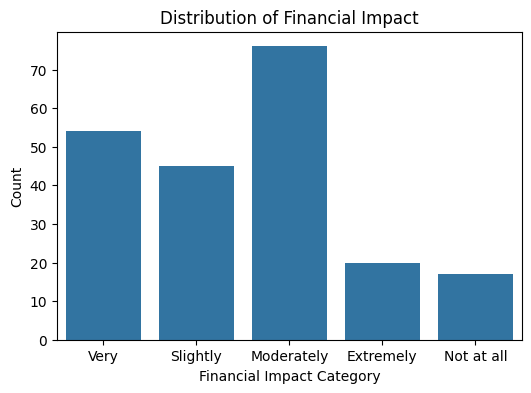

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Distribution of Financial Impact')
plt.xlabel('Financial Impact Category')
plt.ylabel('Count')
plt.show()


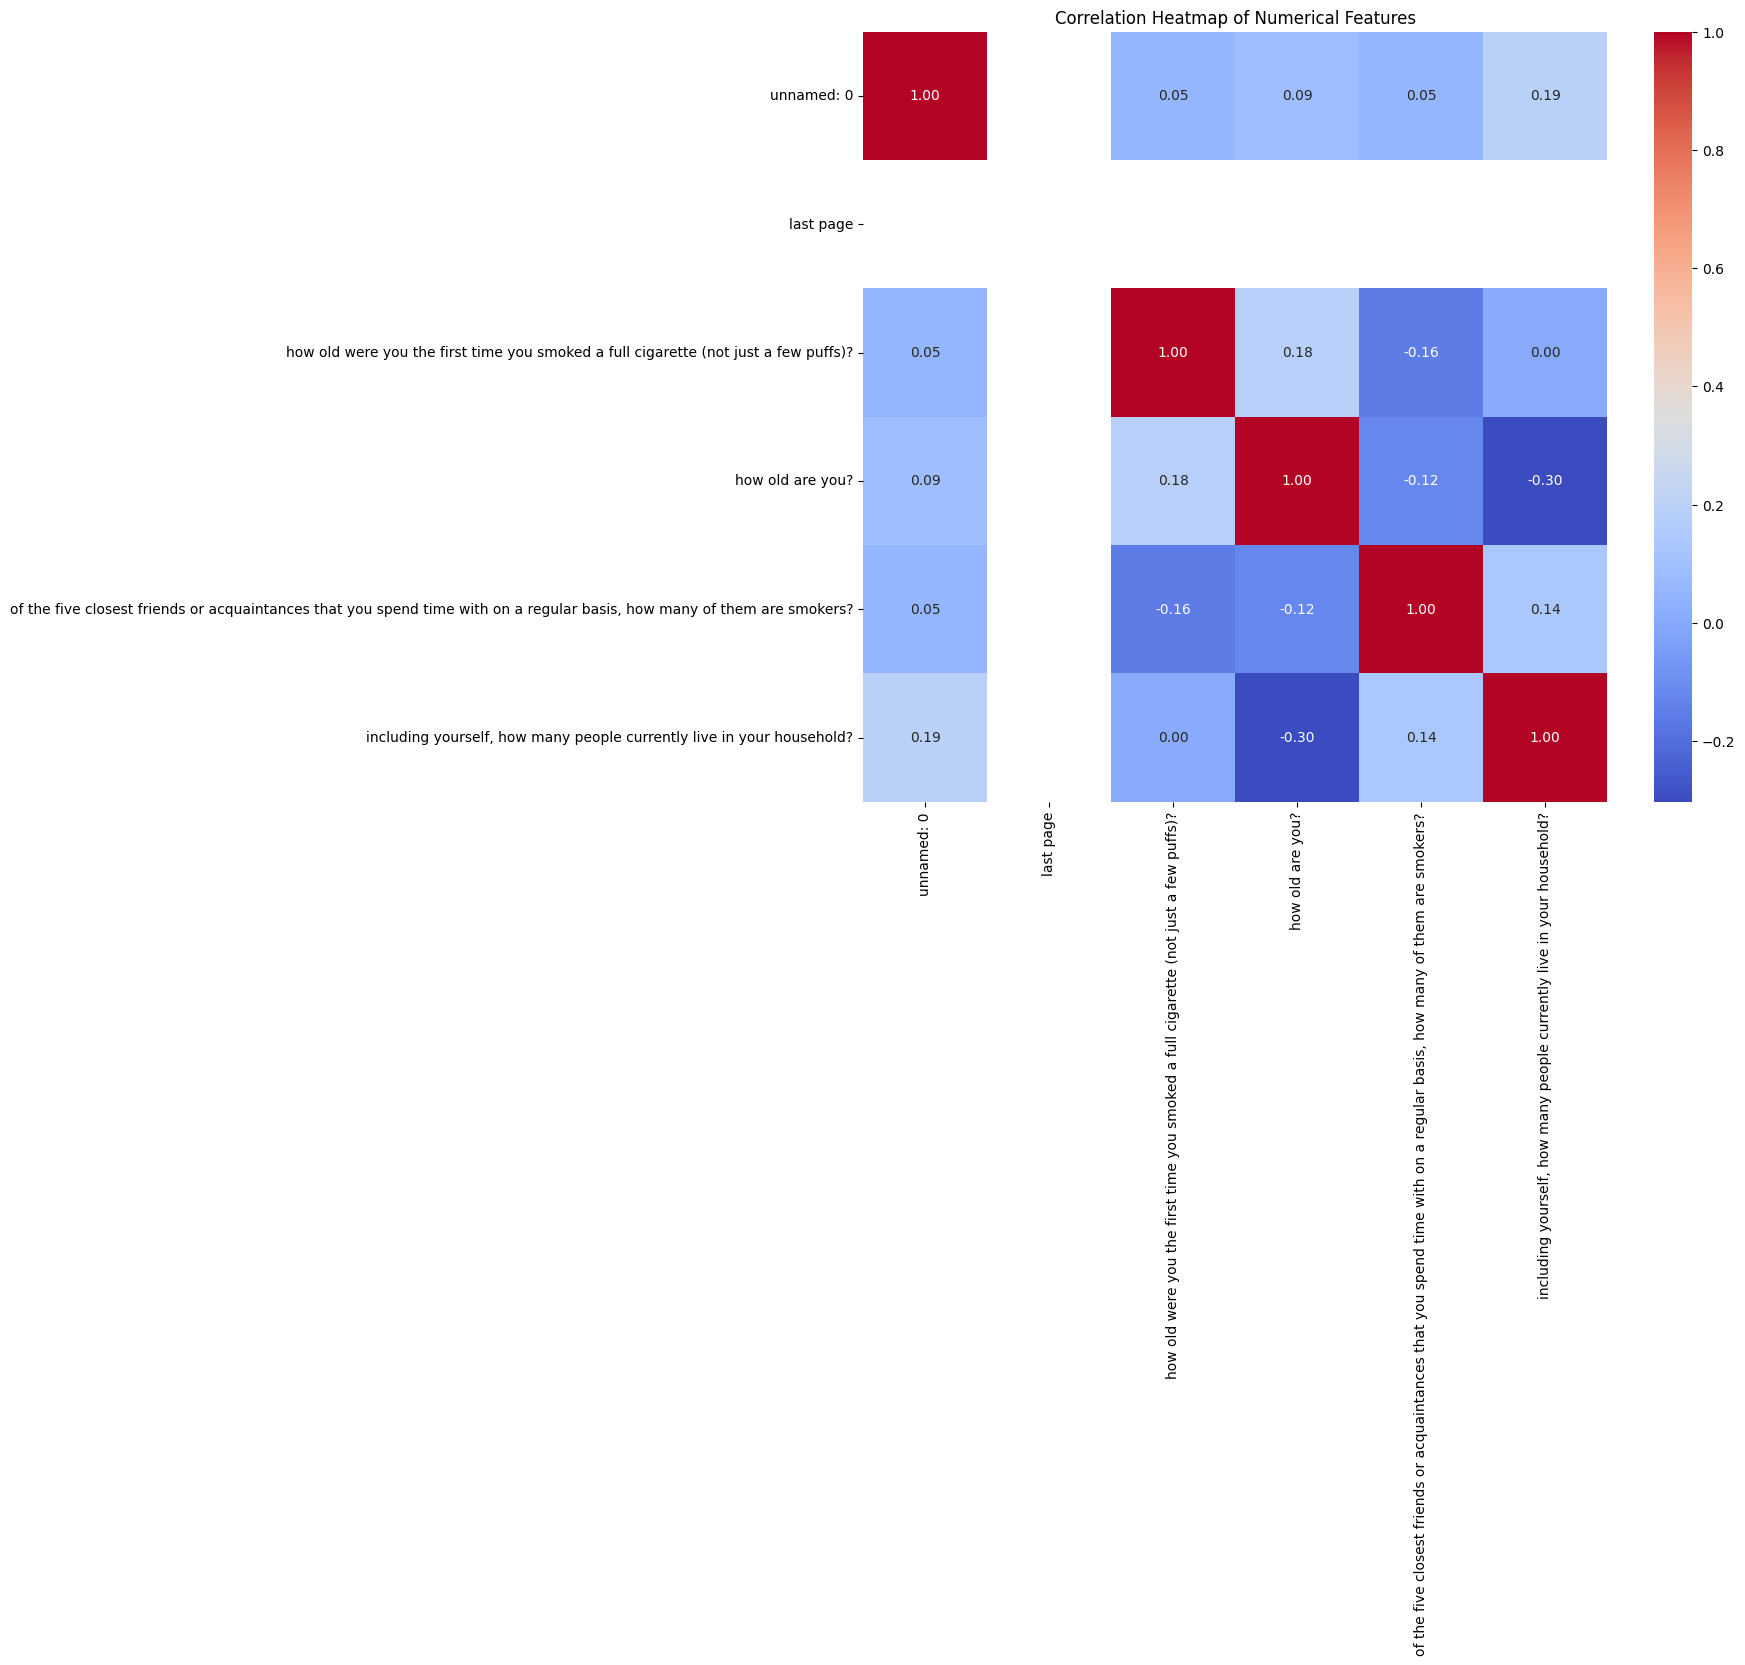

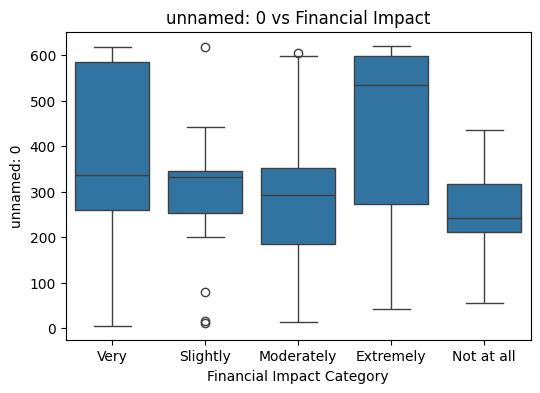

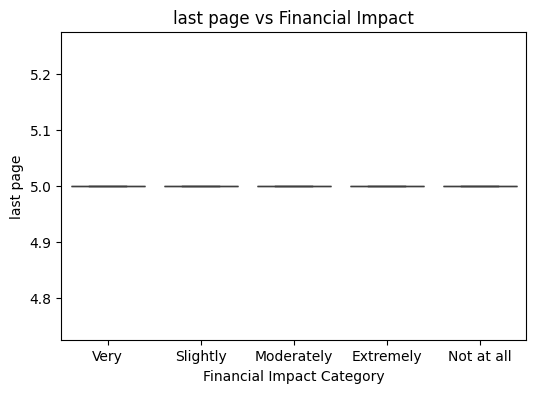

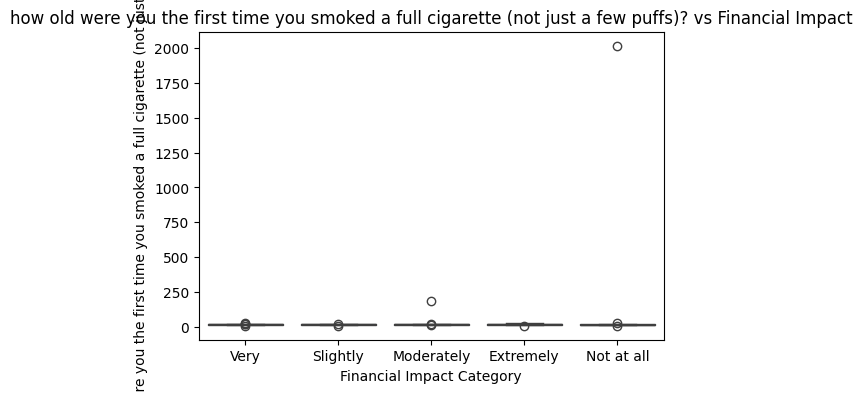

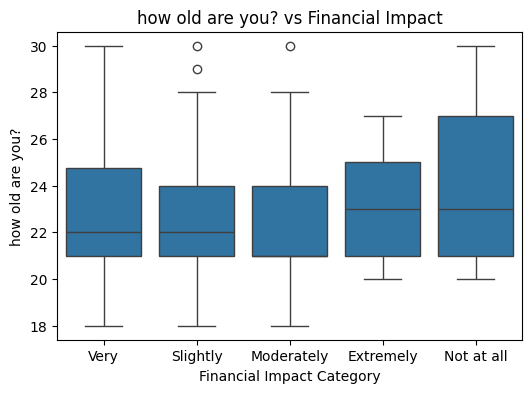

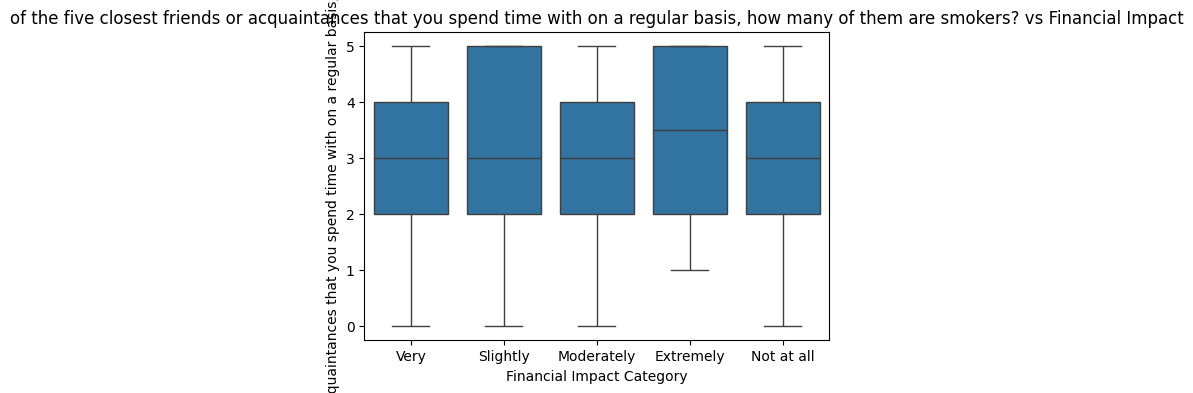

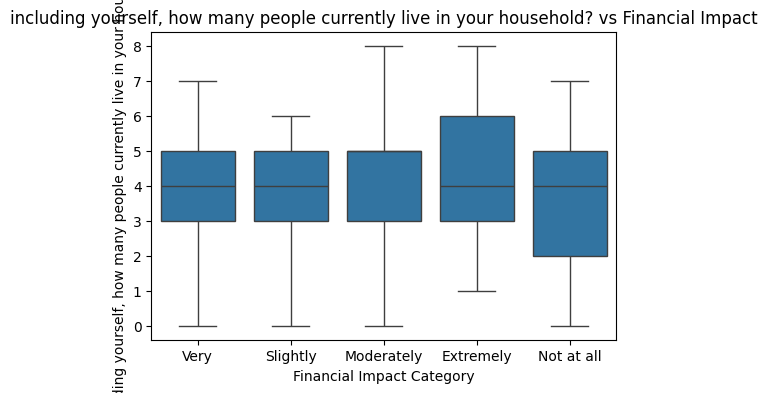

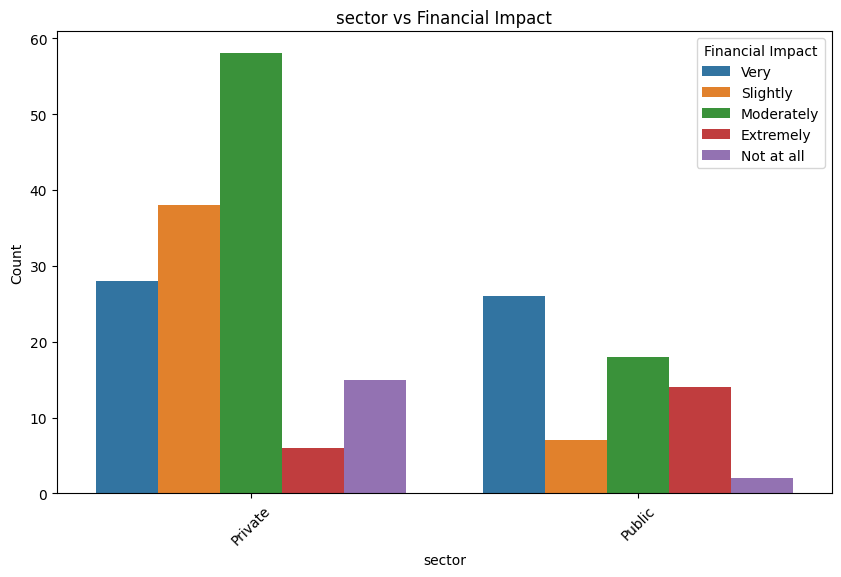

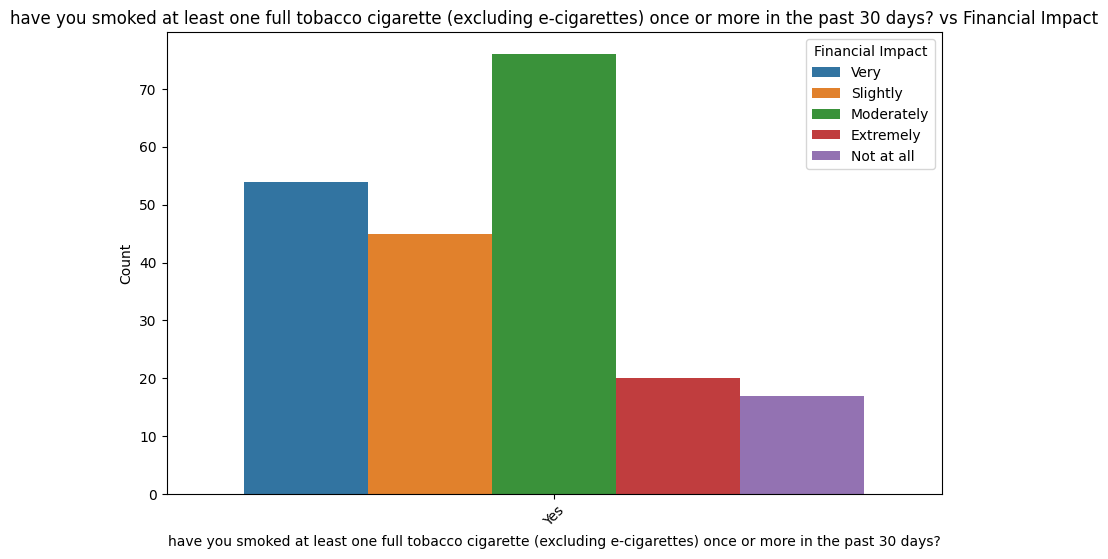

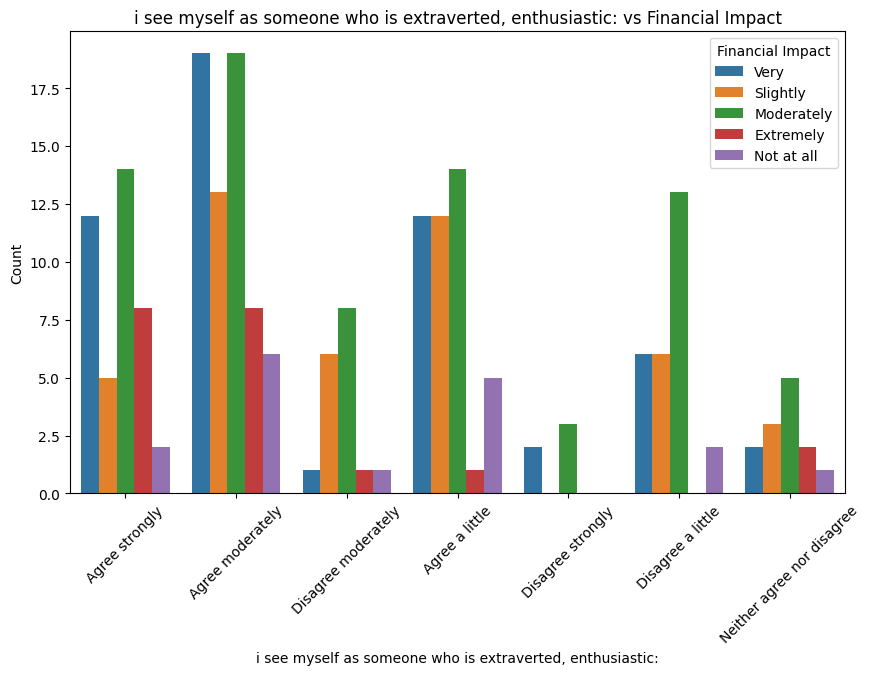

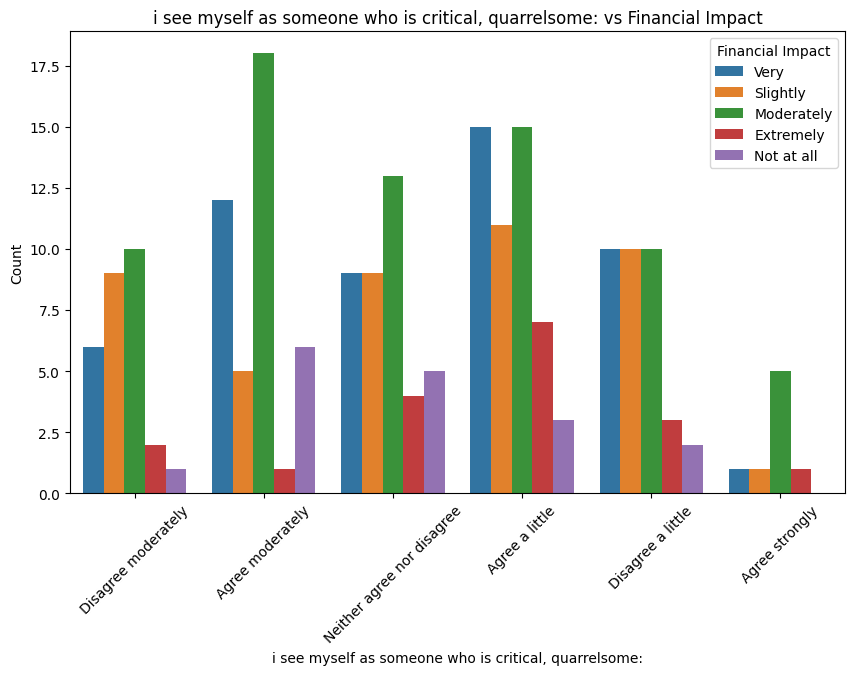

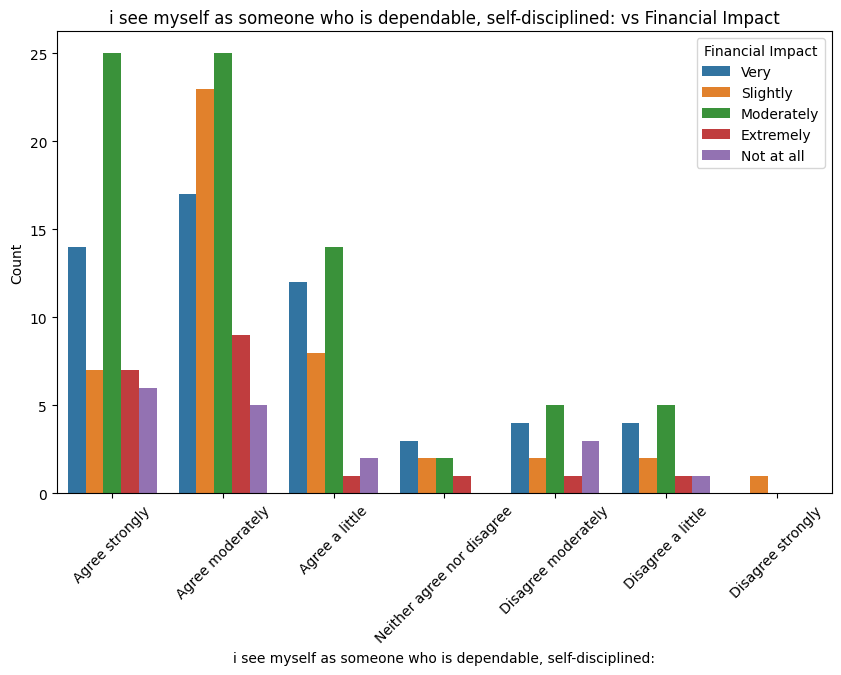

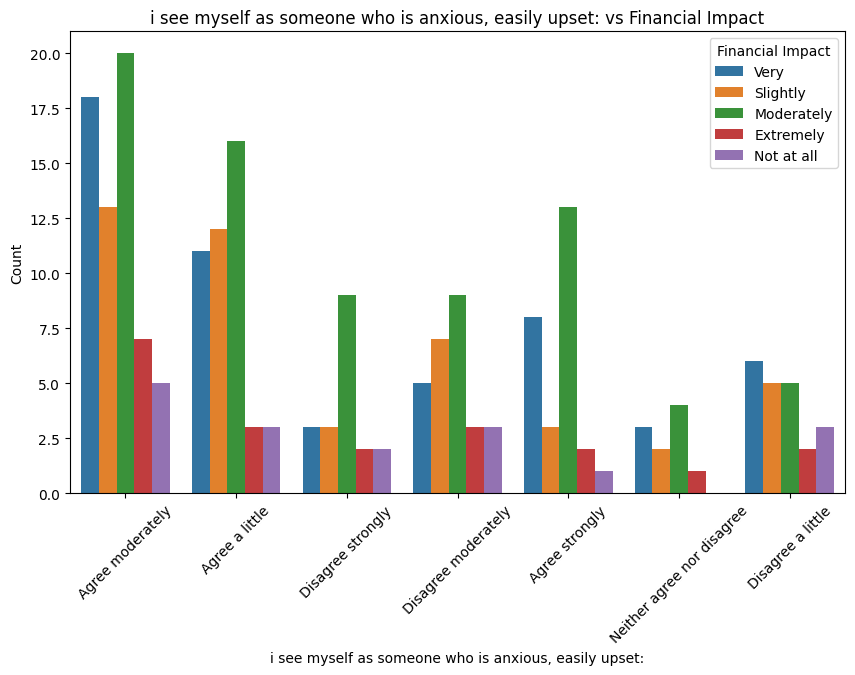

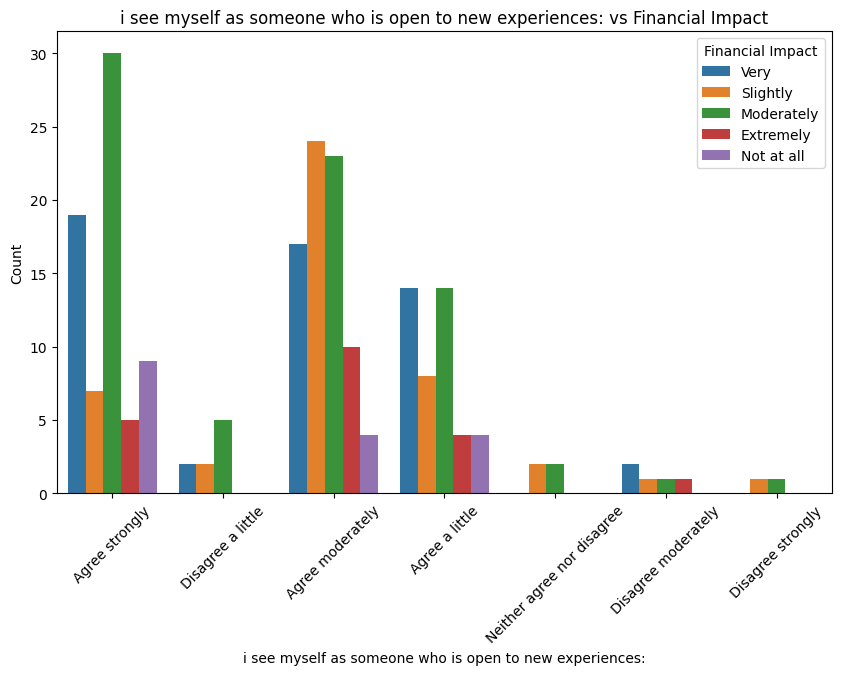

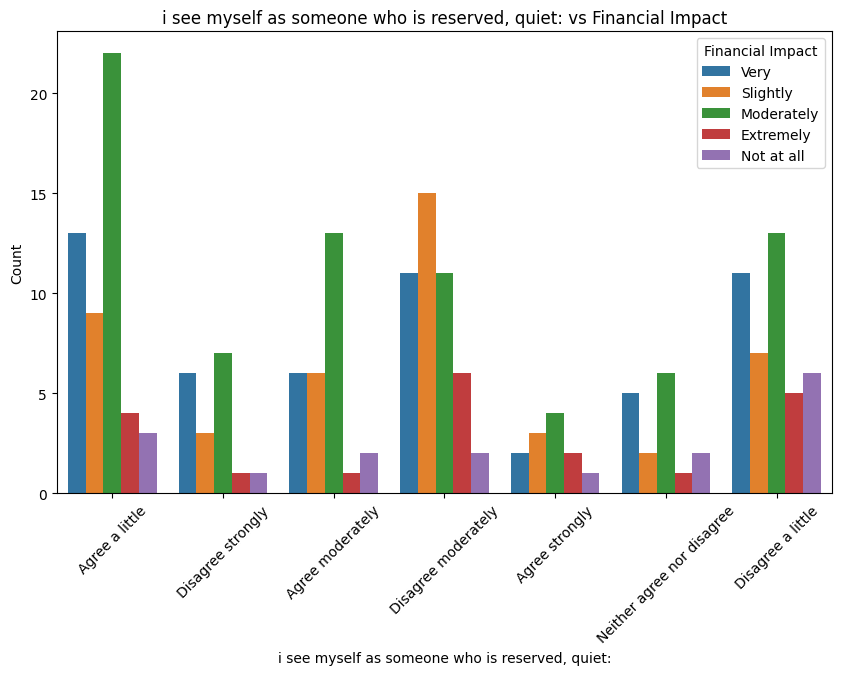

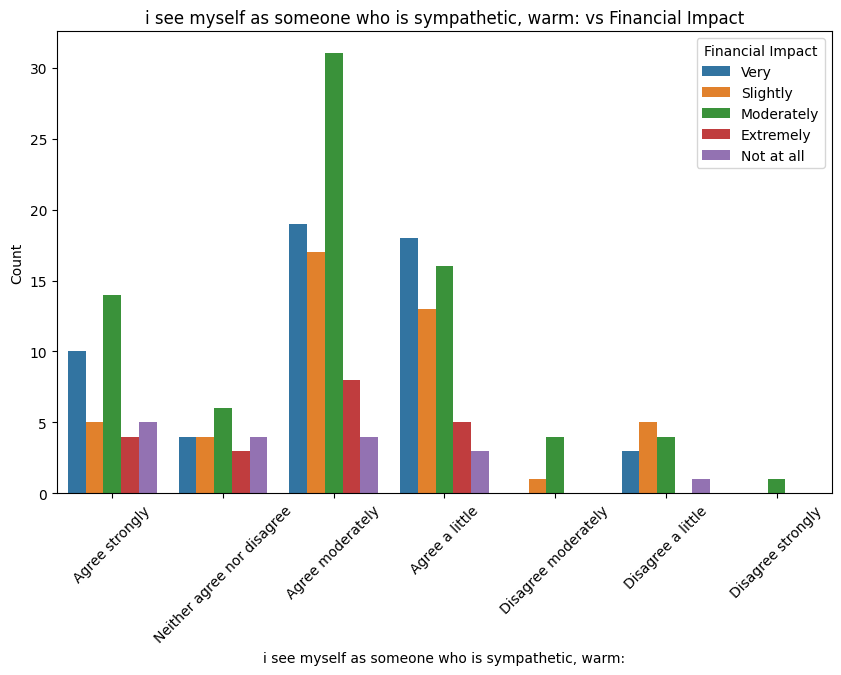

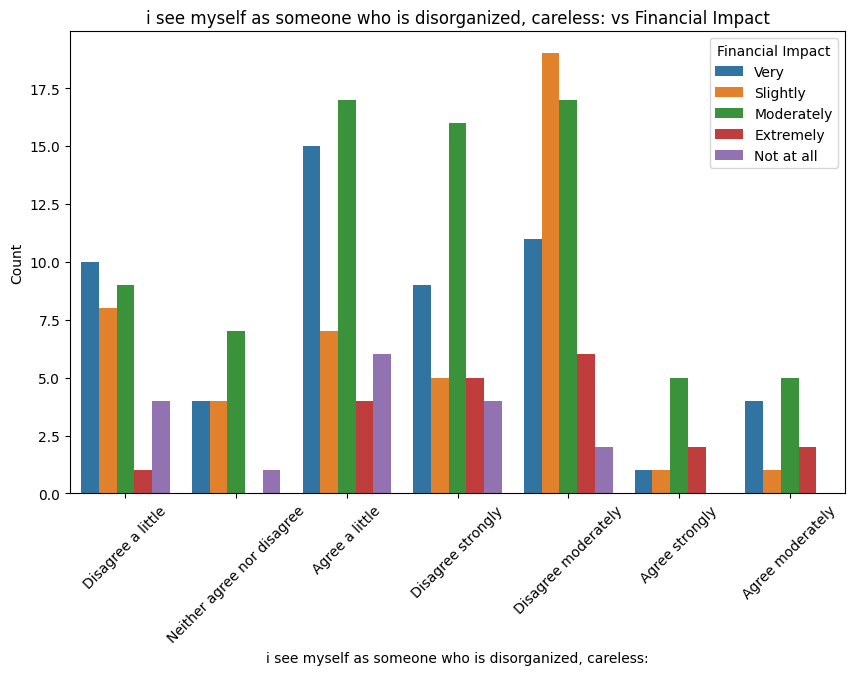

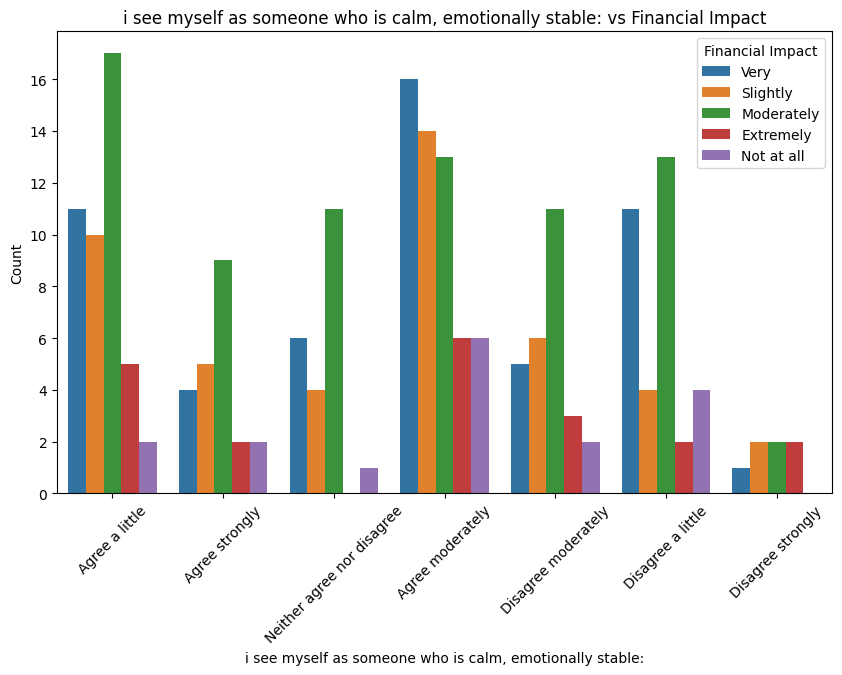

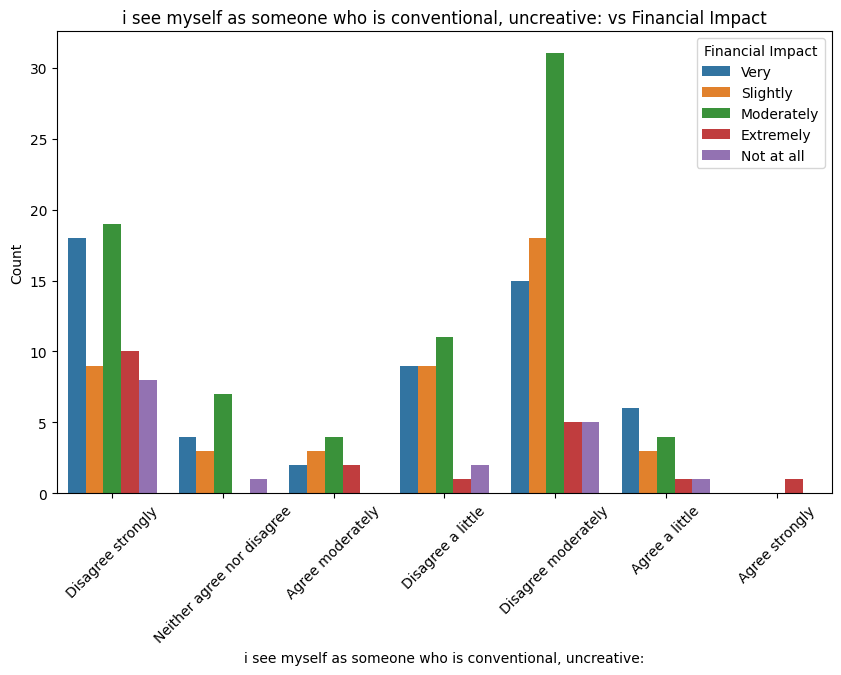

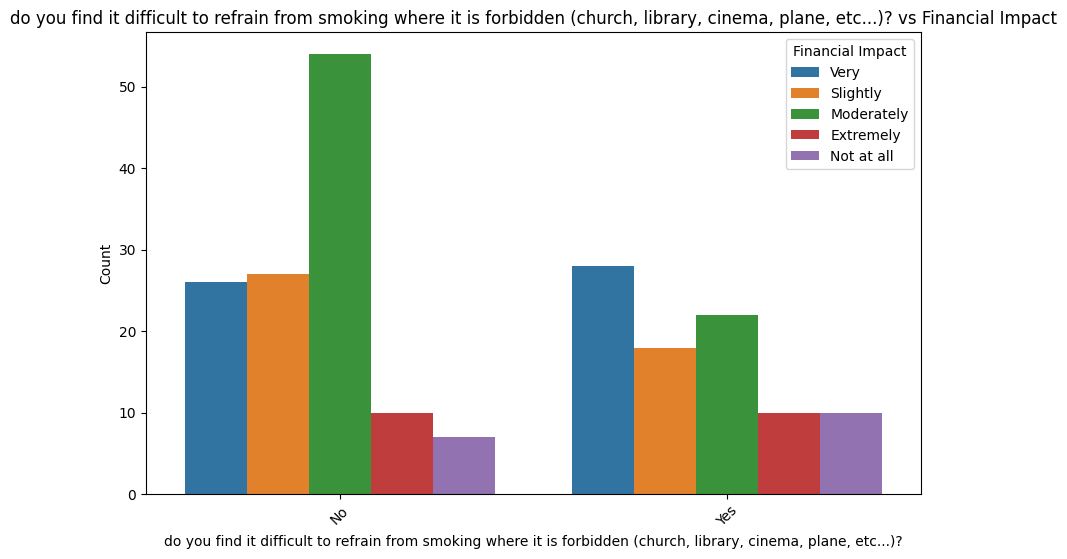

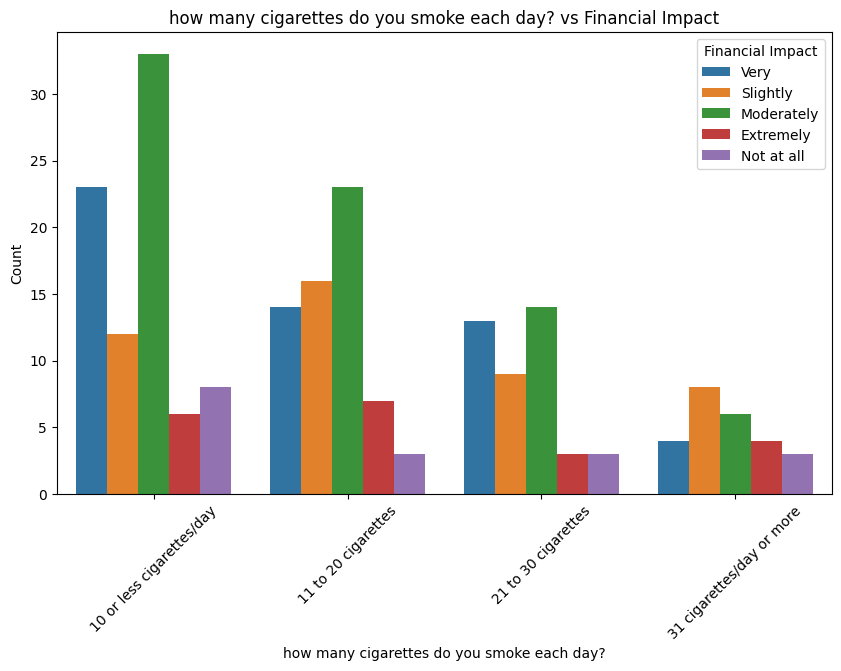

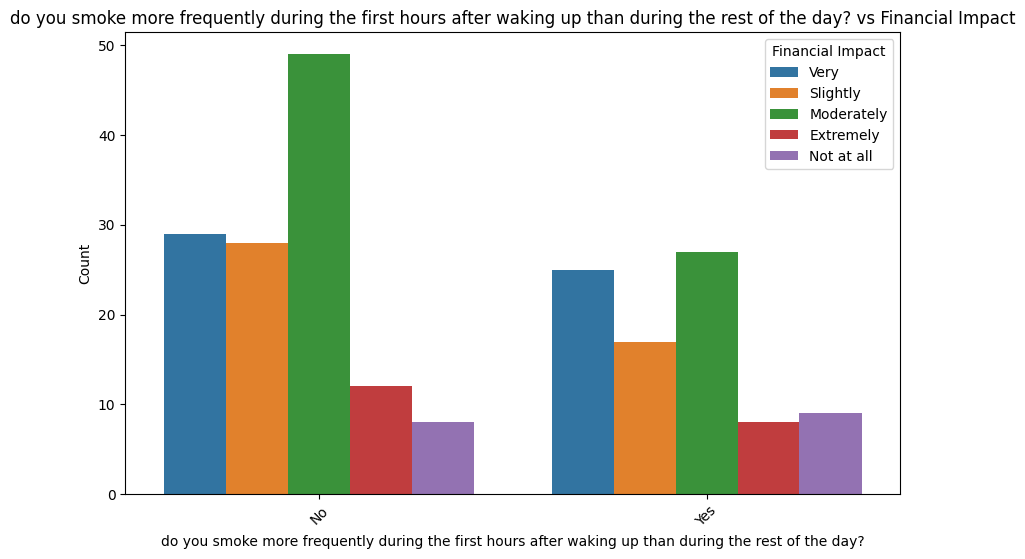

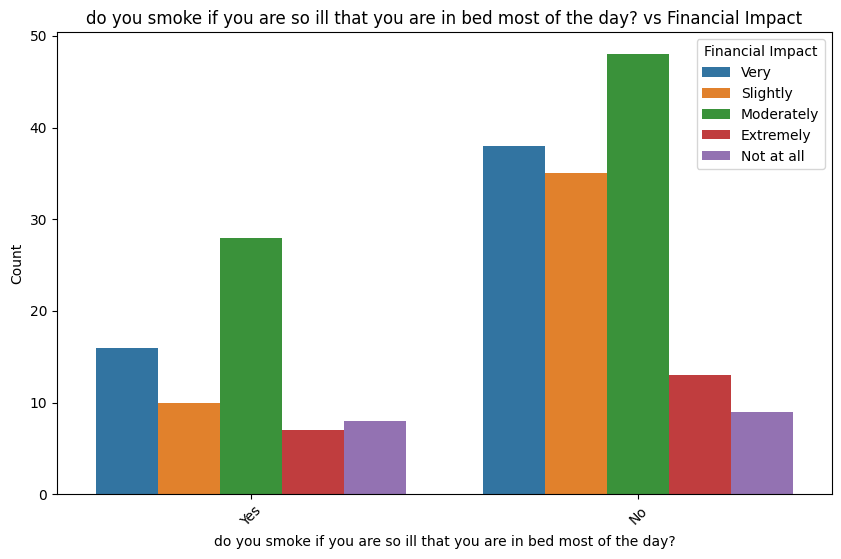

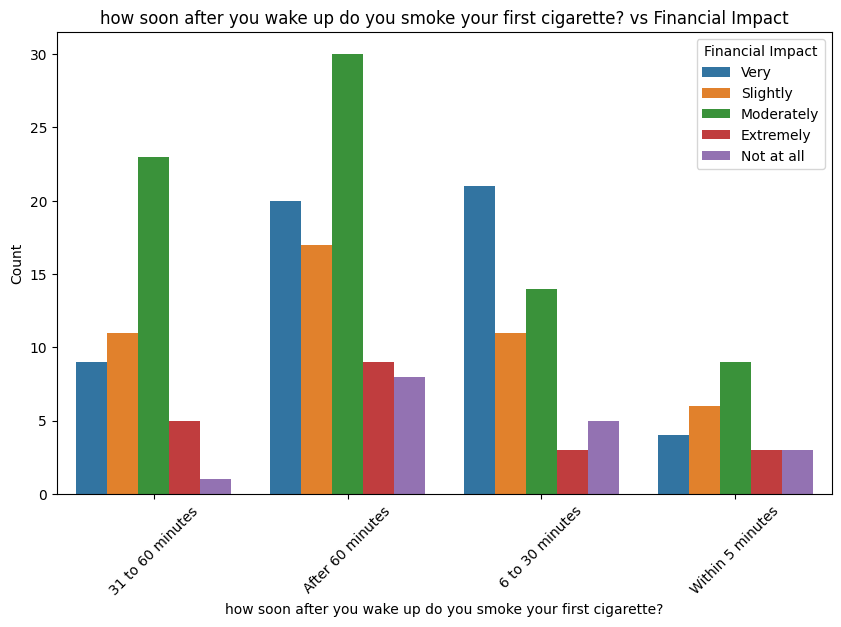

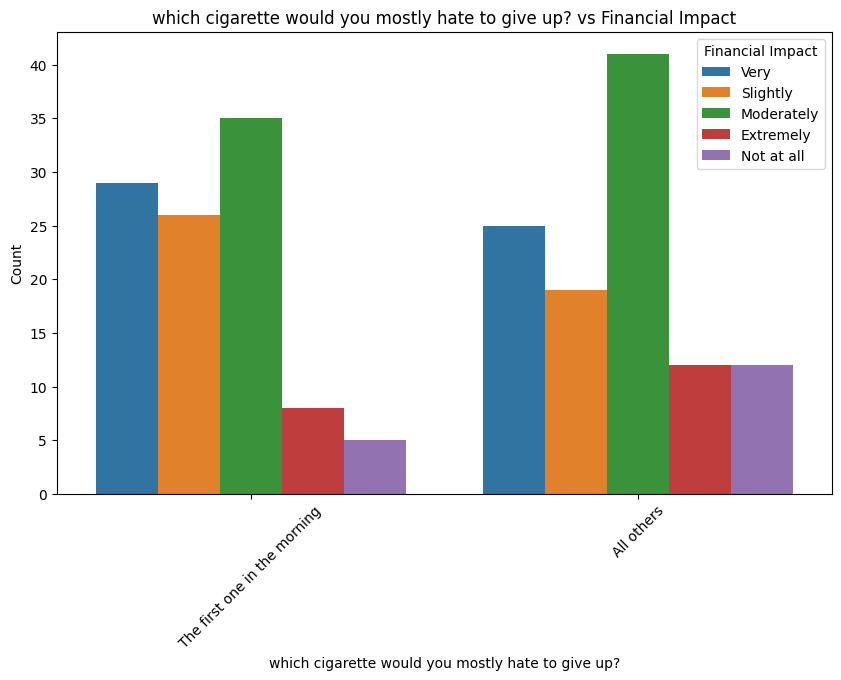

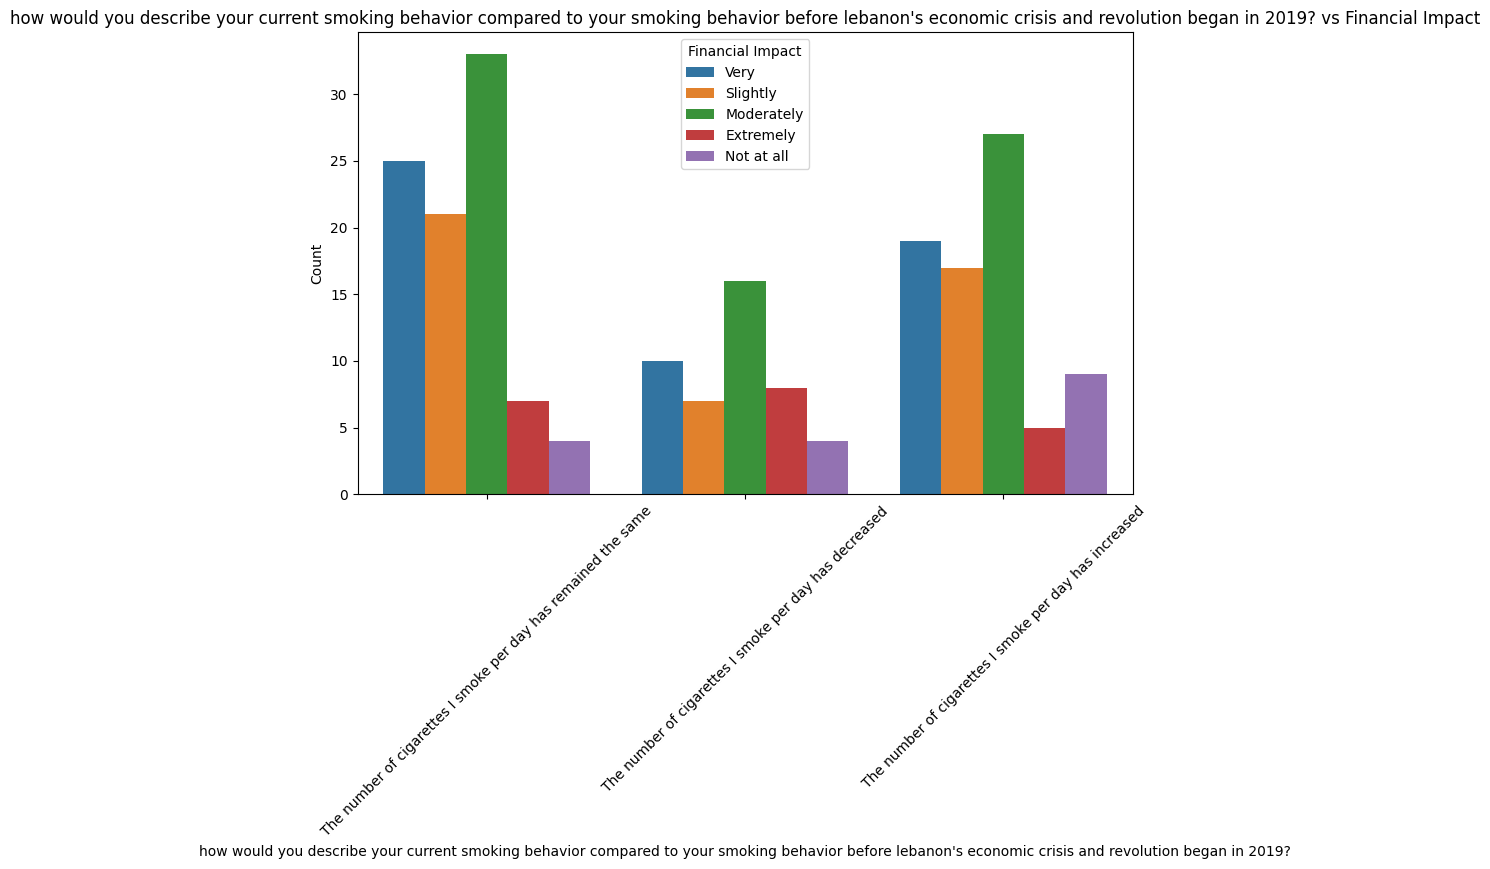

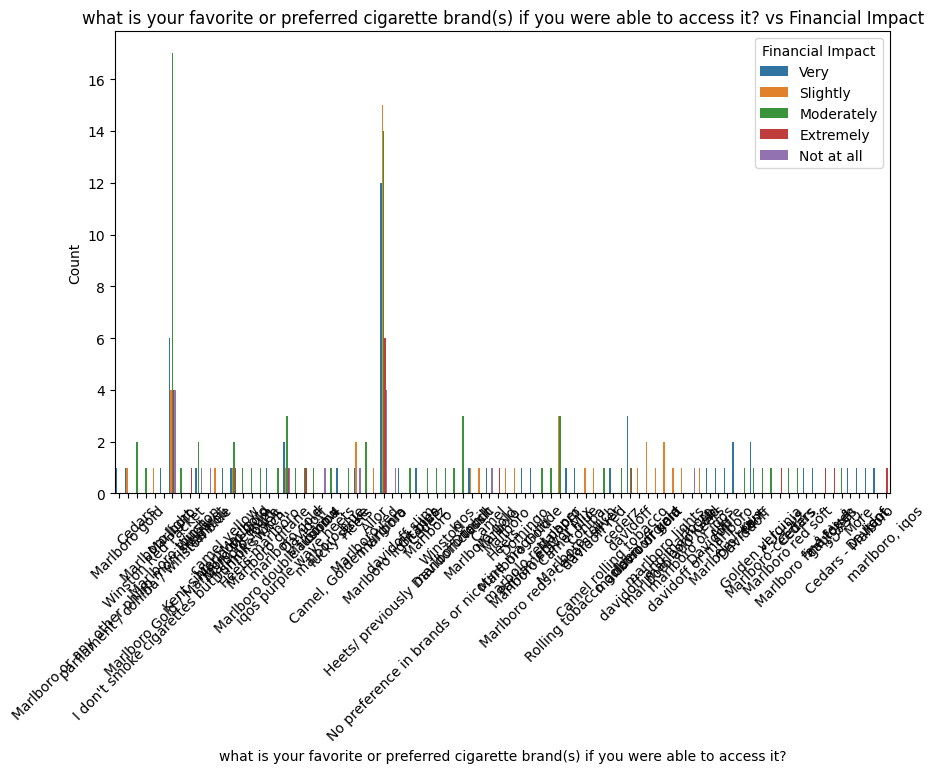

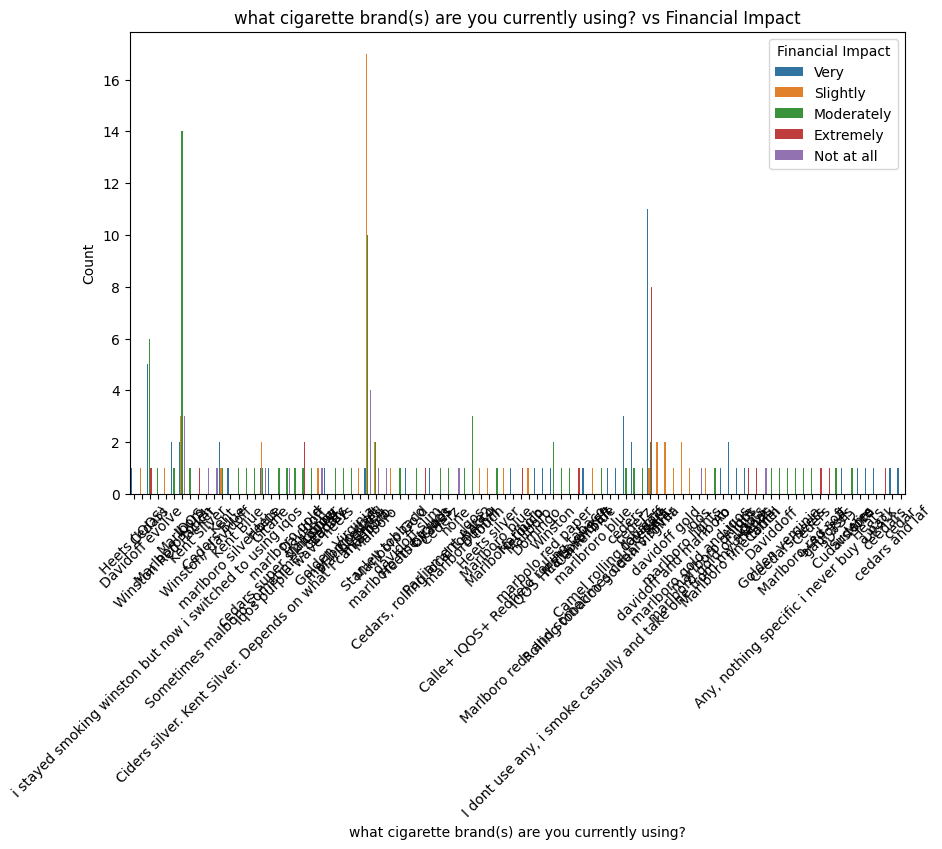

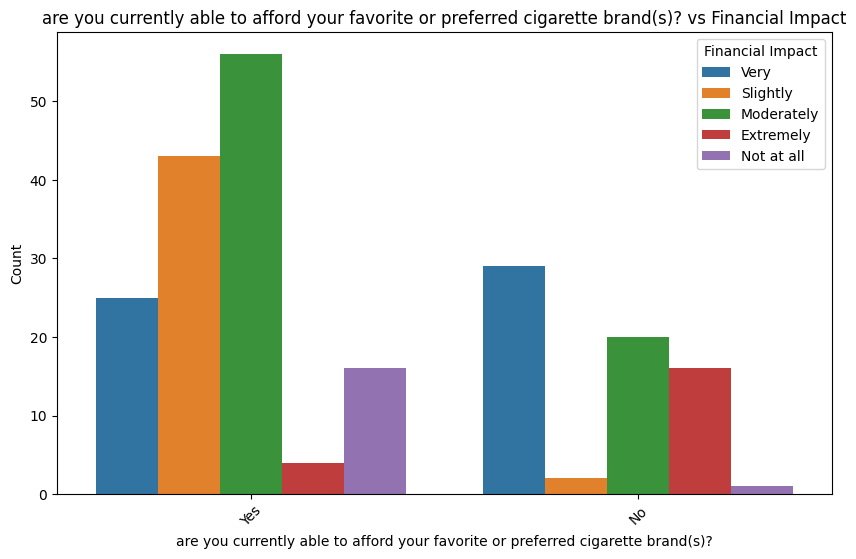

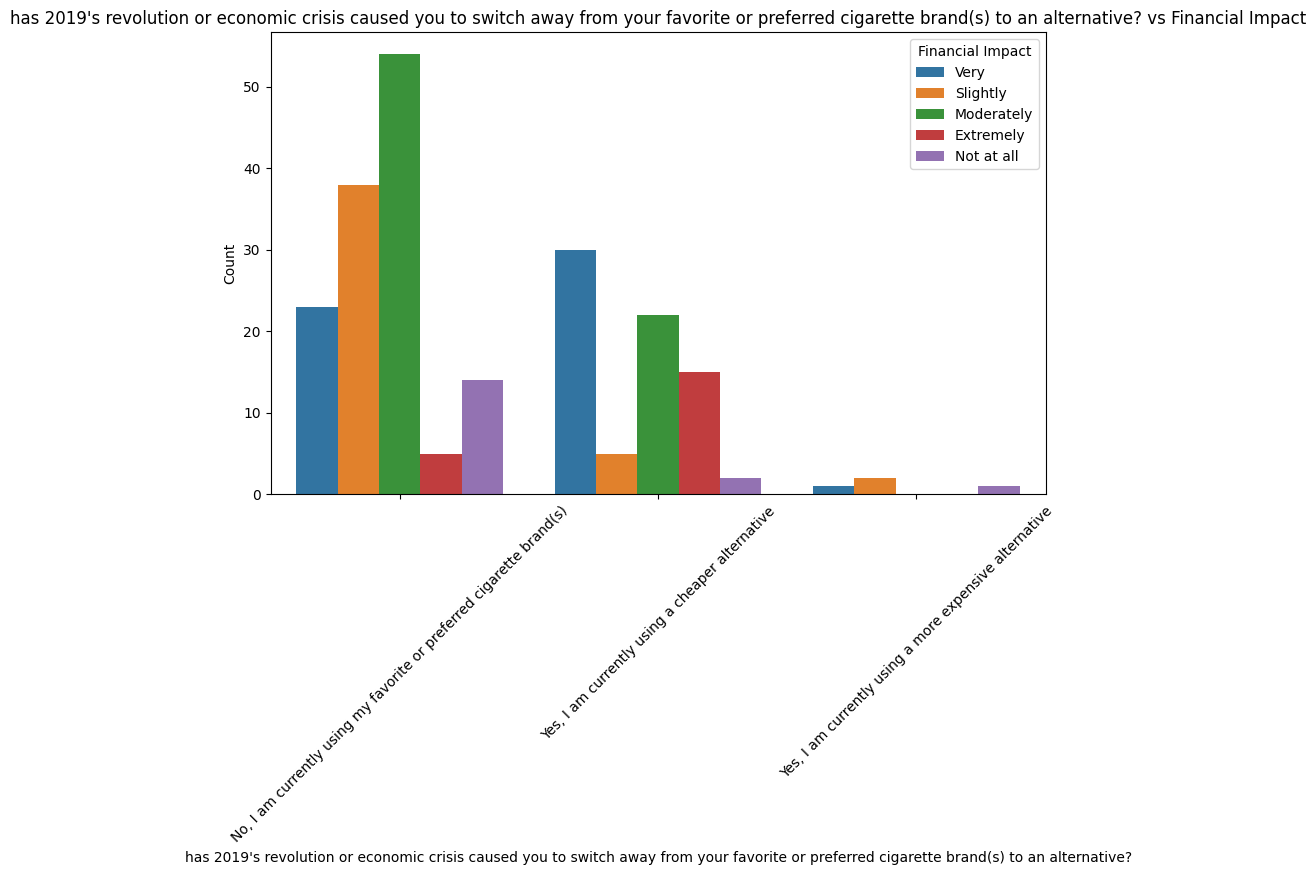

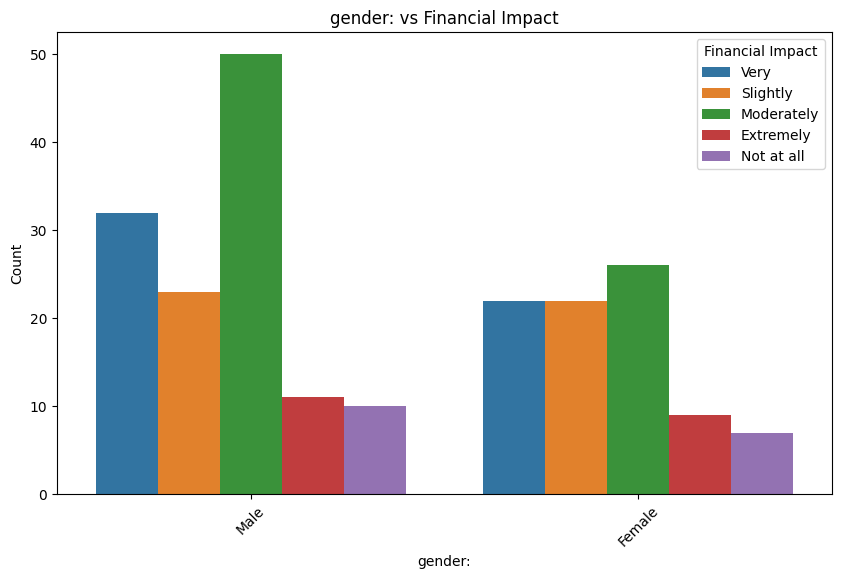

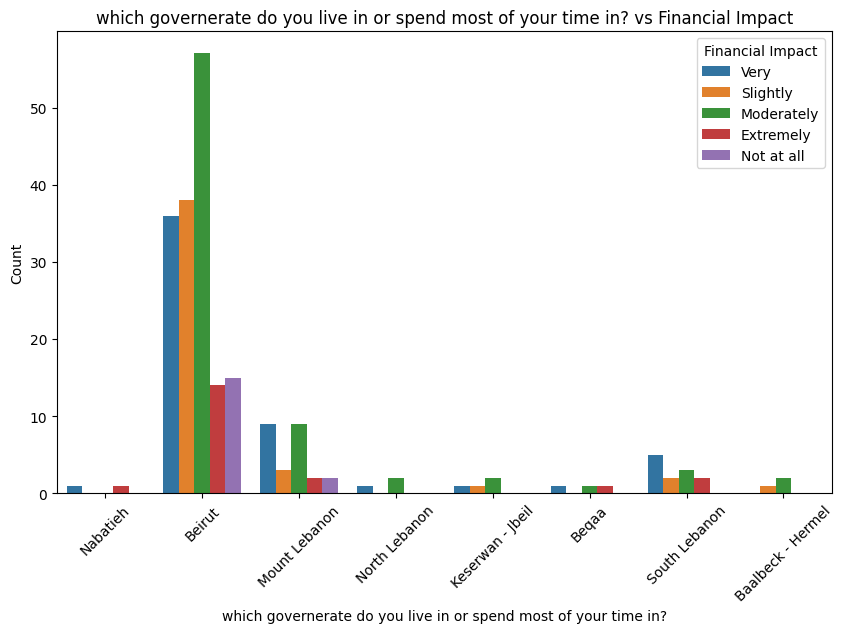

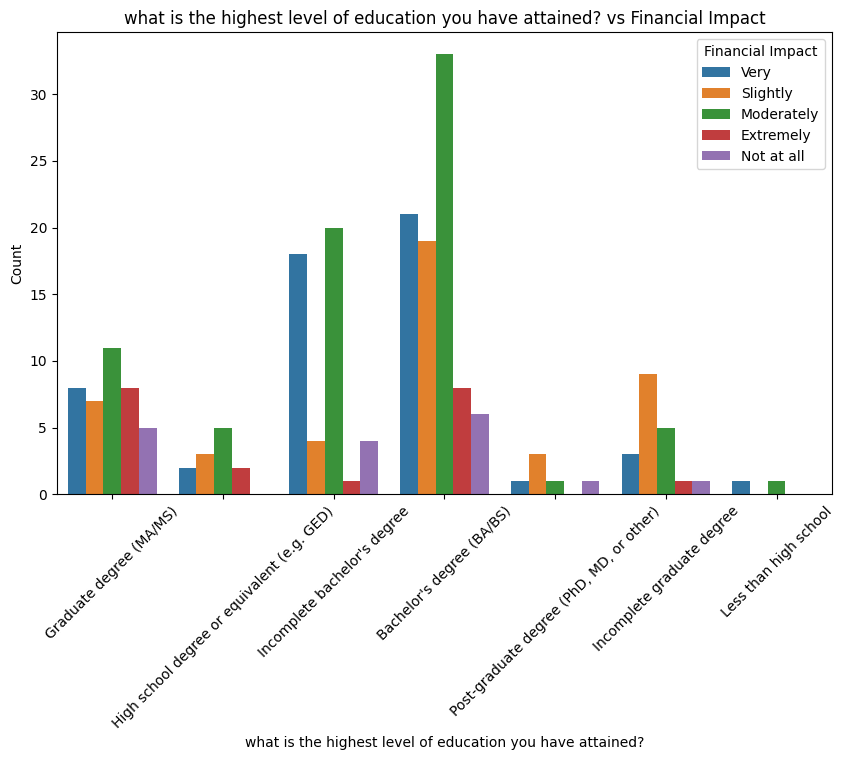

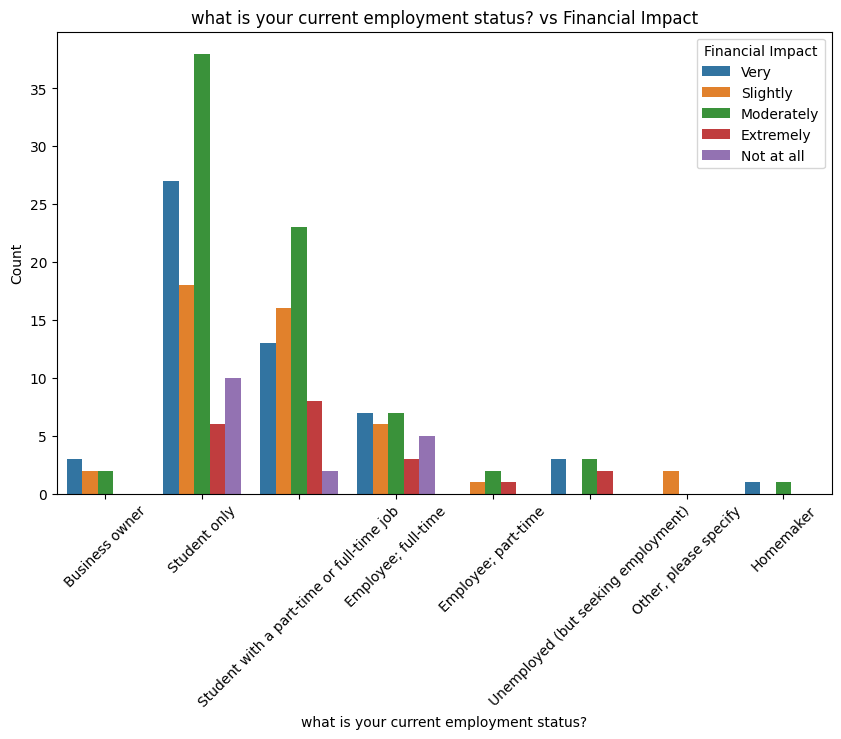

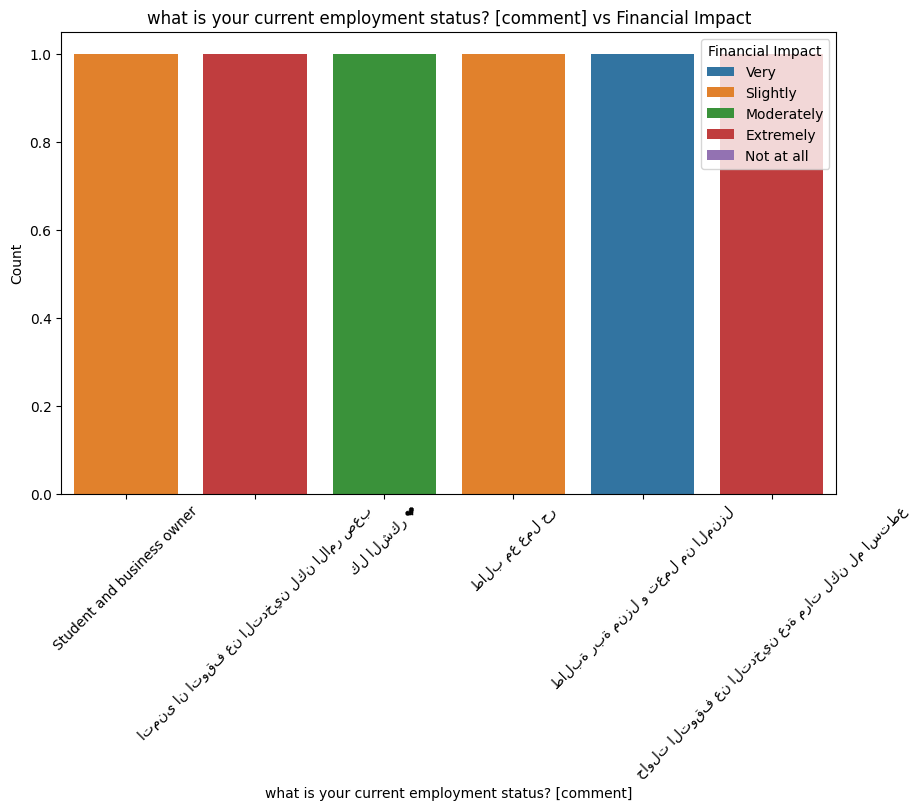

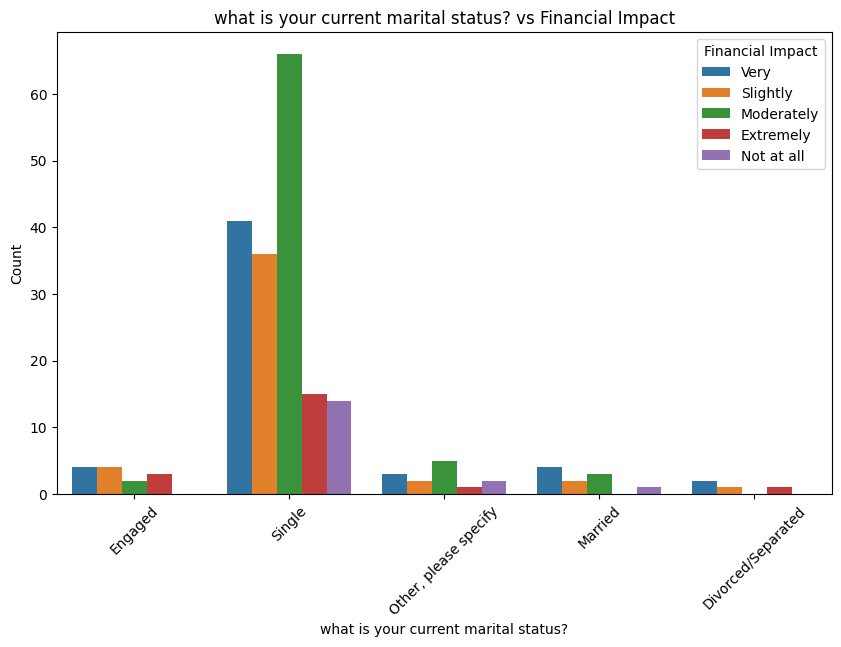

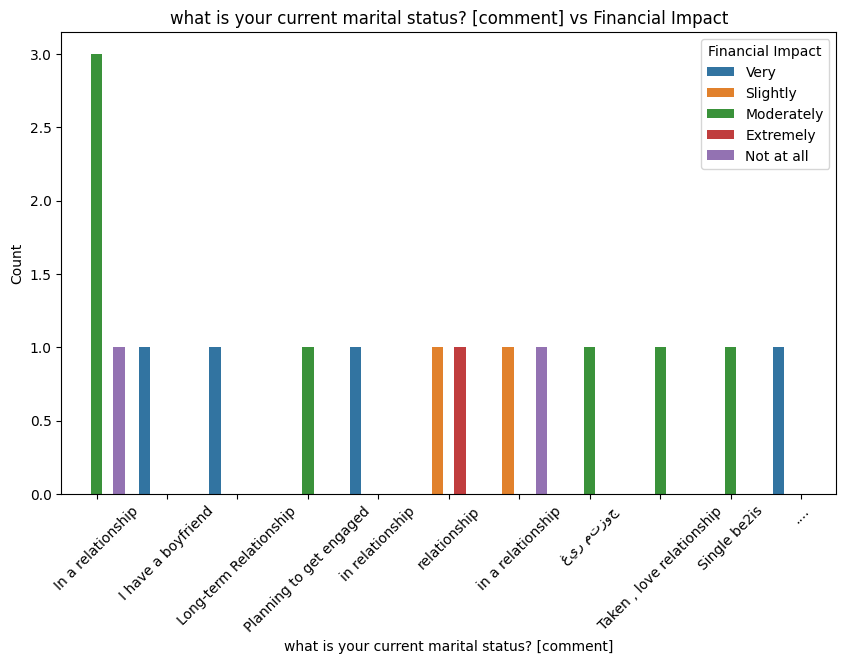

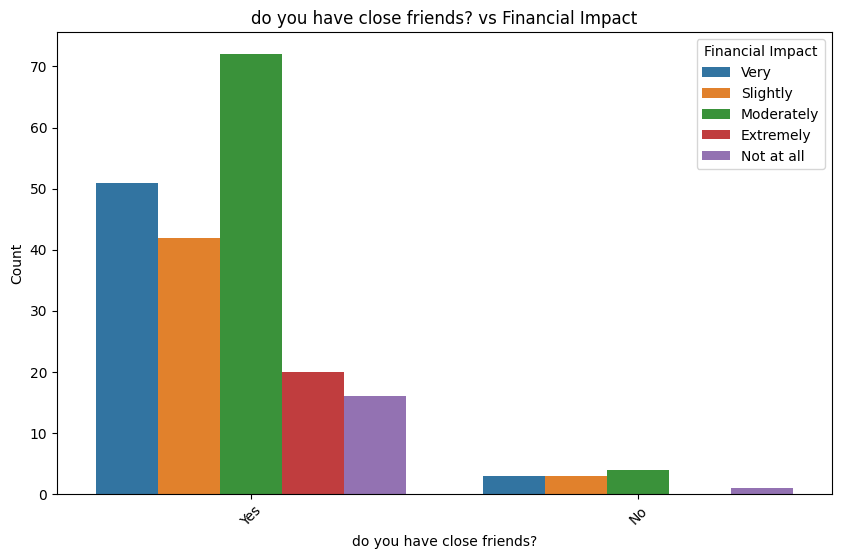

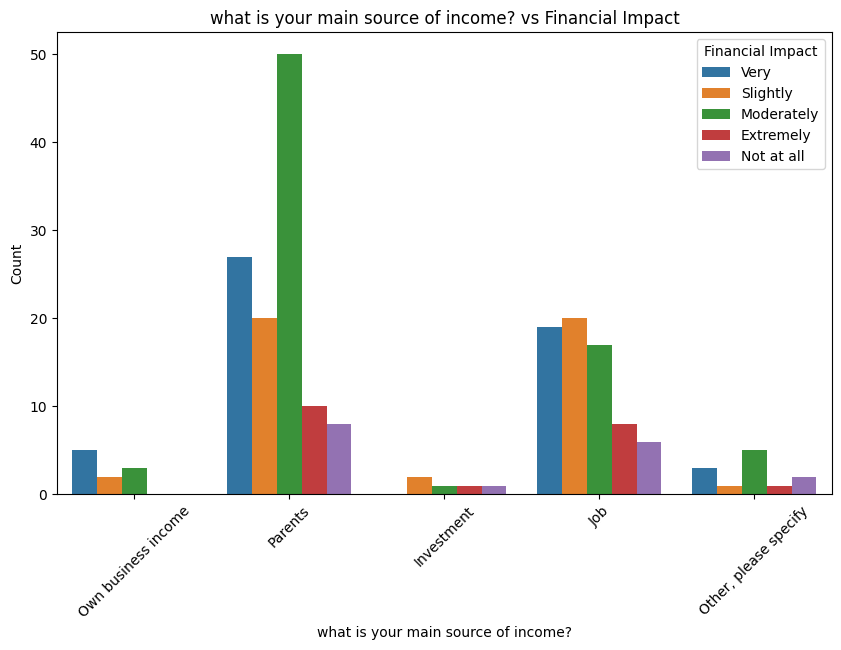

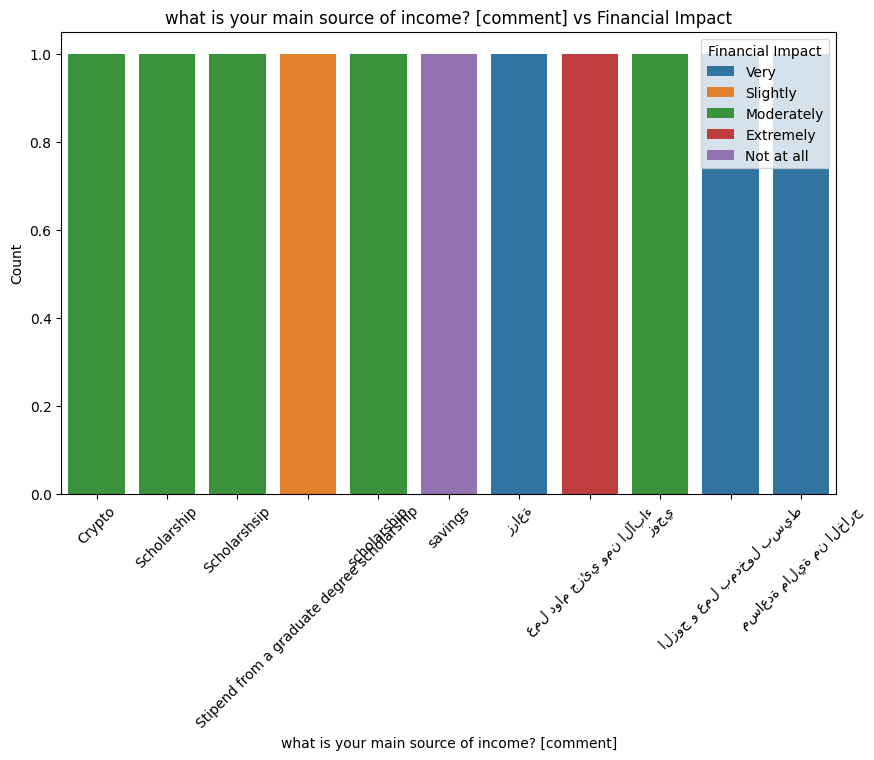

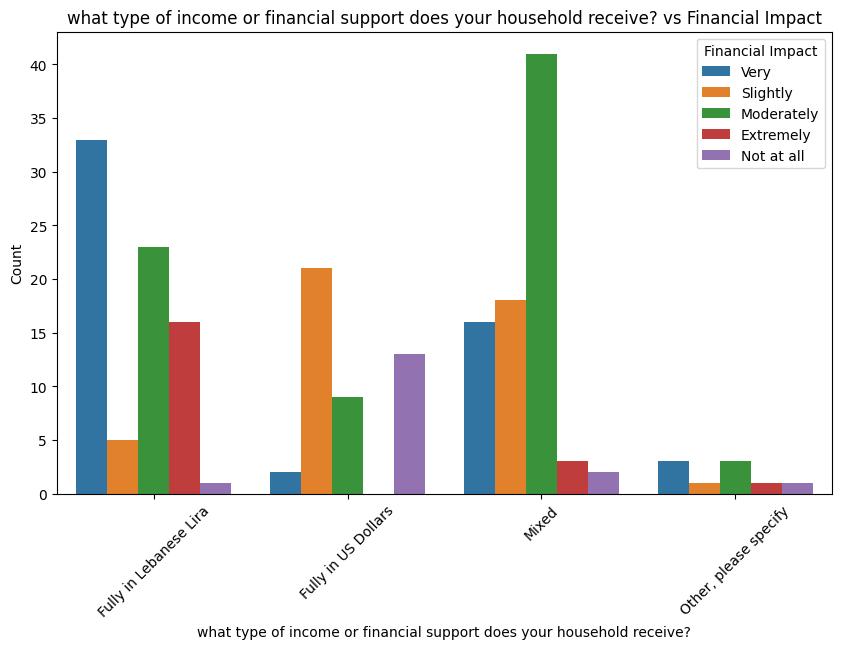

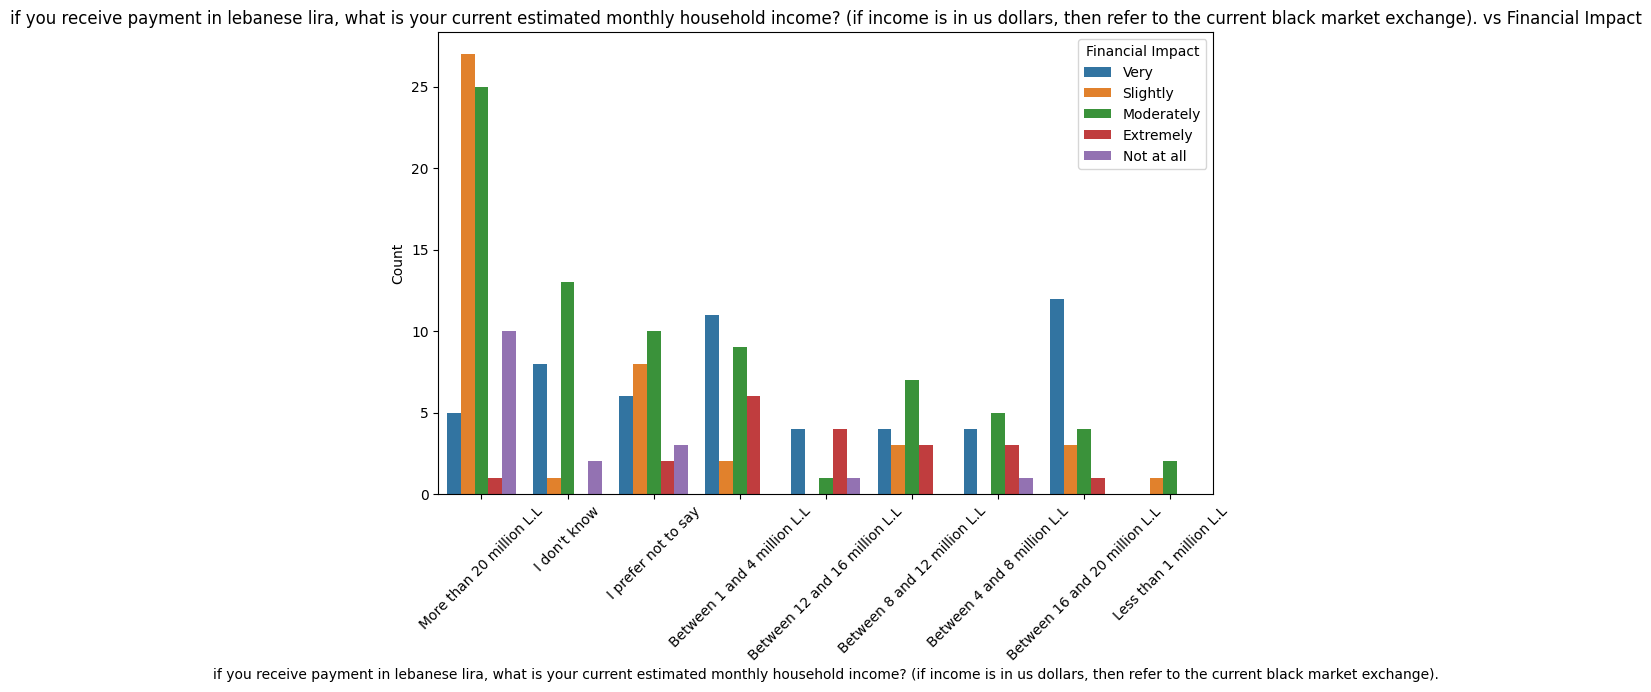

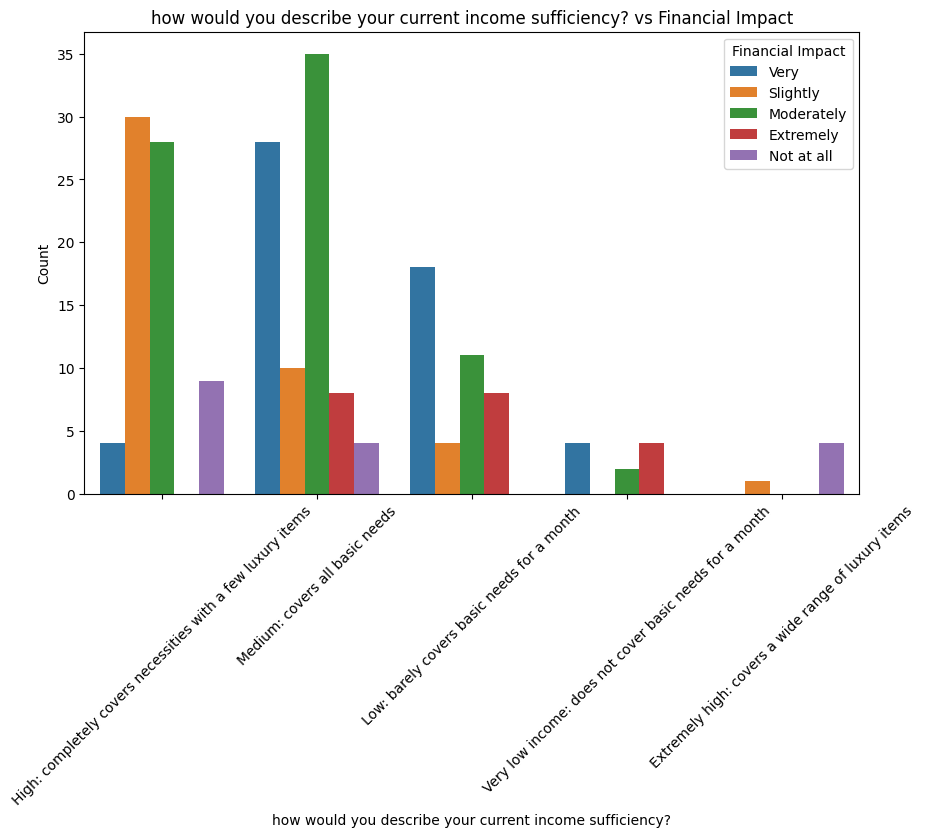

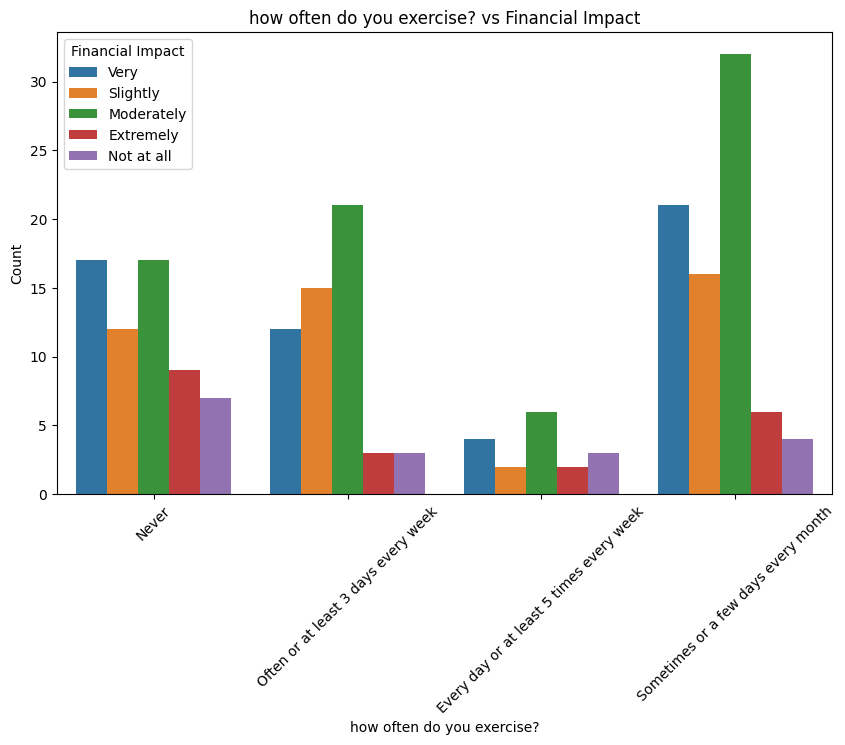

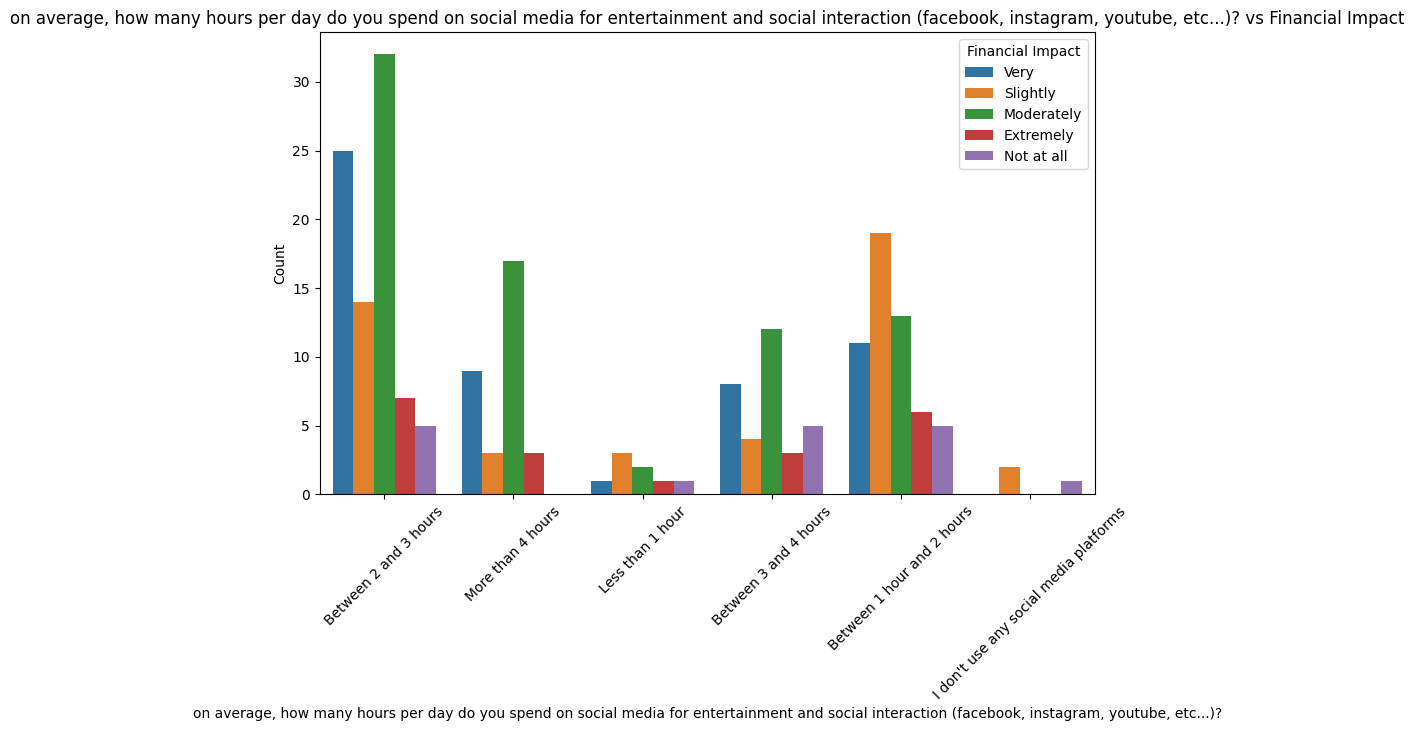

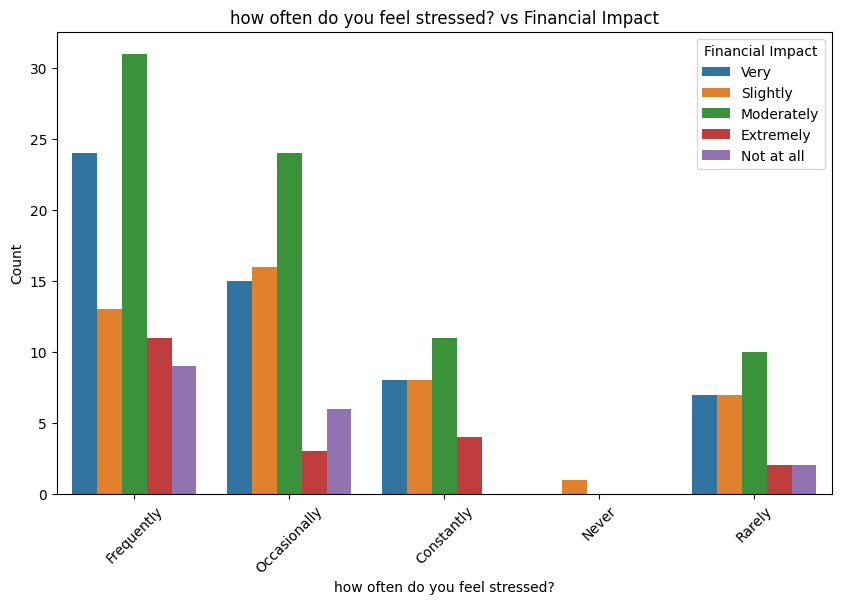

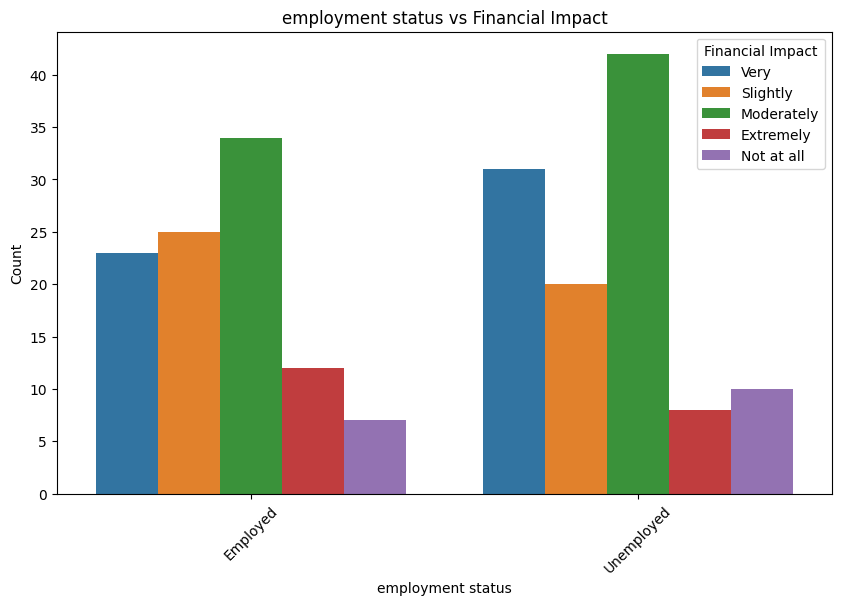

In [26]:
# Correlation heatmap of numerical features before PCA
plt.figure(figsize=(12,10))
sns.heatmap(X.select_dtypes(include=['int64', 'float64']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=data[col])
    plt.title(f'{col} vs Financial Impact')
    plt.xlabel('Financial Impact Category')
    plt.ylabel(col)
    plt.show()
for col in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, hue=y, data=data)
    plt.title(f'{col} vs Financial Impact')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Financial Impact')
    plt.xticks(rotation=45)
    plt.show()


##11. Modeling

Using Different models To see which is the best

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],                      # Reduced number of C values
    'penalty': ['l2'],      # Add L2 regularization explicitly
    'solver': ['lbfgs']                     # Using only 'lbfgs' solver for simplicity
}

# Initialize Logistic Regression model with class_weight='balanced' to handle class imbalance
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    cv=3,                                   # Reduced cross-validation folds for speed
    n_jobs=-1,
    scoring='accuracy',
    verbose=2                               # Added verbosity to monitor progress
)

# Fit GridSearchCV on training set
grid_search_lr.fit(X_train, y_train)

# Best Logistic Regression model
best_lr = grid_search_lr.best_estimator_
print("\nBest Logistic Regression Parameters:", grid_search_lr.best_params_)



from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],             # Number of trees
    'max_depth': [None, 10, 20],            # Maximum depth of the tree
    'min_samples_split': [2, 5],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],             # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

# Initialize Random Forest model with class_weight='balanced' to handle class imbalance
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,                                   # Reduced cross-validation folds for speed
    n_jobs=-1,
    scoring='accuracy',
    verbose=2                               # Added verbosity to monitor progress
)

# Fit GridSearchCV on training set
grid_search_rf.fit(X_train, y_train)

# Best Random Forest model
best_rf = grid_search_rf.best_estimator_
print("\nBest Random Forest Parameters:", grid_search_rf.best_params_)




from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit GridSearchCV
grid_search_gb.fit(X_train, y_train)

# Best Gradient Boosting model
best_gb = grid_search_gb.best_estimator_
print("\nBest Gradient Boosting Parameters:", grid_search_gb.best_params_)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [1, 10],                            # Reduced C values
    'kernel': ['linear', 'rbf'],            # Limited kernels
    'gamma': ['scale']                       # Fixed gamma to 'scale'
}

# Initialize SVM model with class_weight='balanced' to handle class imbalance
svm = SVC(probability=True, random_state=42, class_weight='balanced')

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    cv=3,                                   # Reduced cross-validation folds for speed
    n_jobs=-1,
    scoring='accuracy',
    verbose=2                               # Added verbosity to monitor progress
)

# Fit GridSearchCV on training set
grid_search_svm.fit(X_train, y_train)

# Best SVM model
best_svm = grid_search_svm.best_estimator_
print("\nBest SVM Parameters:", grid_search_svm.best_params_)

# Initialize models dictionary with tuned models
models = {
    'Logistic Regression': best_lr,
    'Random Forest': best_rf,            # Assuming best_rf was defined earlier
    'Gradient Boosting': best_gb,
    'Support Vector Machine': best_svm
}

# Initialize dictionary to store performance metrics
model_performance = {}


Fitting 3 folds for each of 3 candidates, totalling 9 fits

Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Fitting 3 folds for each of 48 candidates, totalling 144 fits

Best Random Forest Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Best Gradient Boosting Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


##12. Evaluating Models and Visulization of accuracy
Evaluating The models and seeing which is the best for this task


Evaluating model: Logistic Regression
Validation Accuracy: 0.3953
Validation ROC AUC Score: 0.7637957059280589
Test Accuracy: 0.3721
Test ROC AUC Score: 0.7629006614300732

Classification Report for Logistic Regression on Validation Set:

              precision    recall  f1-score   support

   Extremely       0.17      0.50      0.25         4
  Moderately       0.50      0.31      0.38        16
  Not at all       0.33      0.33      0.33         3
    Slightly       0.58      0.78      0.67         9
        Very       0.33      0.18      0.24        11

    accuracy                           0.40        43
   macro avg       0.38      0.42      0.37        43
weighted avg       0.43      0.40      0.39        43



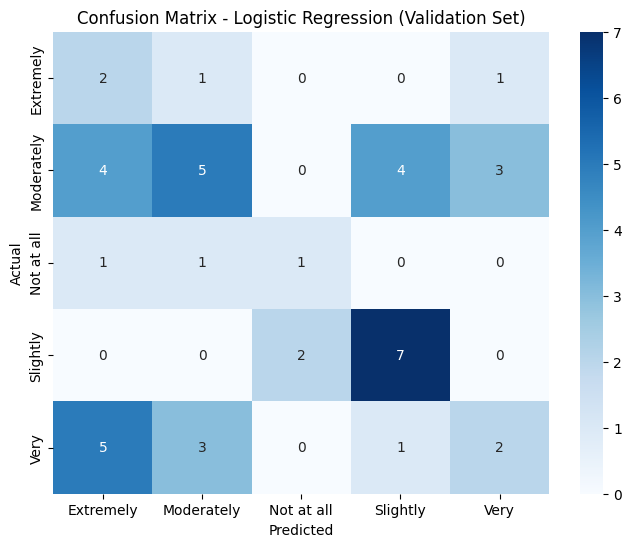

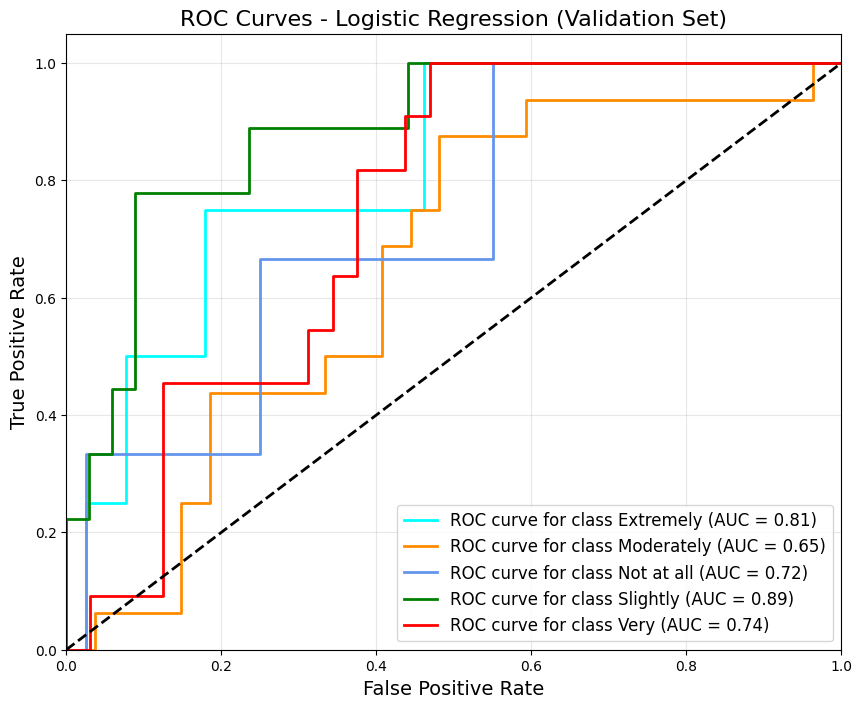


Evaluating model: Random Forest
Validation Accuracy: 0.3488
Validation ROC AUC Score: 0.7270874087785852
Test Accuracy: 0.4884
Test ROC AUC Score: 0.7238762463027169

Classification Report for Random Forest on Validation Set:

              precision    recall  f1-score   support

   Extremely       0.00      0.00      0.00         4
  Moderately       0.38      0.50      0.43        16
  Not at all       0.00      0.00      0.00         3
    Slightly       0.62      0.56      0.59         9
        Very       0.15      0.18      0.17        11

    accuracy                           0.35        43
   macro avg       0.23      0.25      0.24        43
weighted avg       0.31      0.35      0.33        43



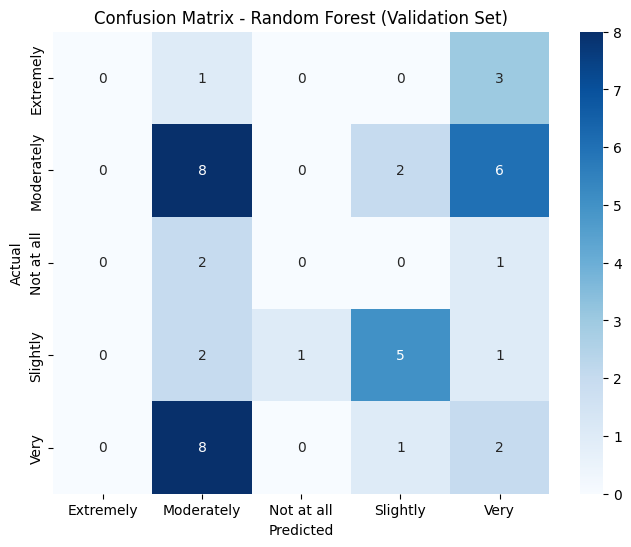

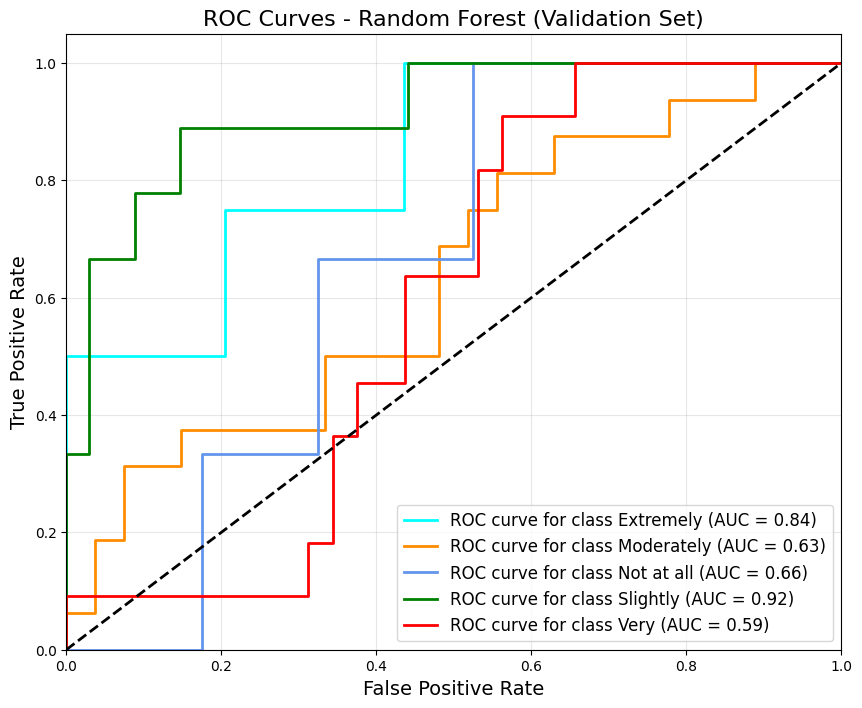


Evaluating model: Gradient Boosting
Validation Accuracy: 0.3488
Validation ROC AUC Score: 0.6979364916129621
Test Accuracy: 0.3721
Test ROC AUC Score: 0.6866123908770966

Classification Report for Gradient Boosting on Validation Set:

              precision    recall  f1-score   support

   Extremely       0.00      0.00      0.00         4
  Moderately       0.42      0.50      0.46        16
  Not at all       0.00      0.00      0.00         3
    Slightly       1.00      0.44      0.62         9
        Very       0.21      0.27      0.24        11

    accuracy                           0.35        43
   macro avg       0.33      0.24      0.26        43
weighted avg       0.42      0.35      0.36        43



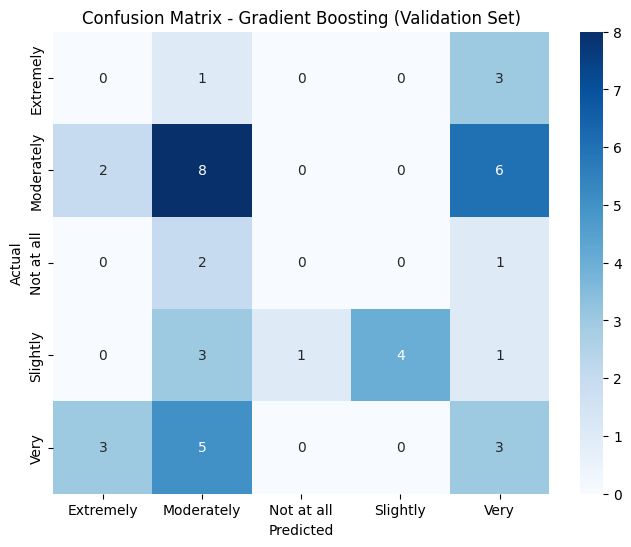

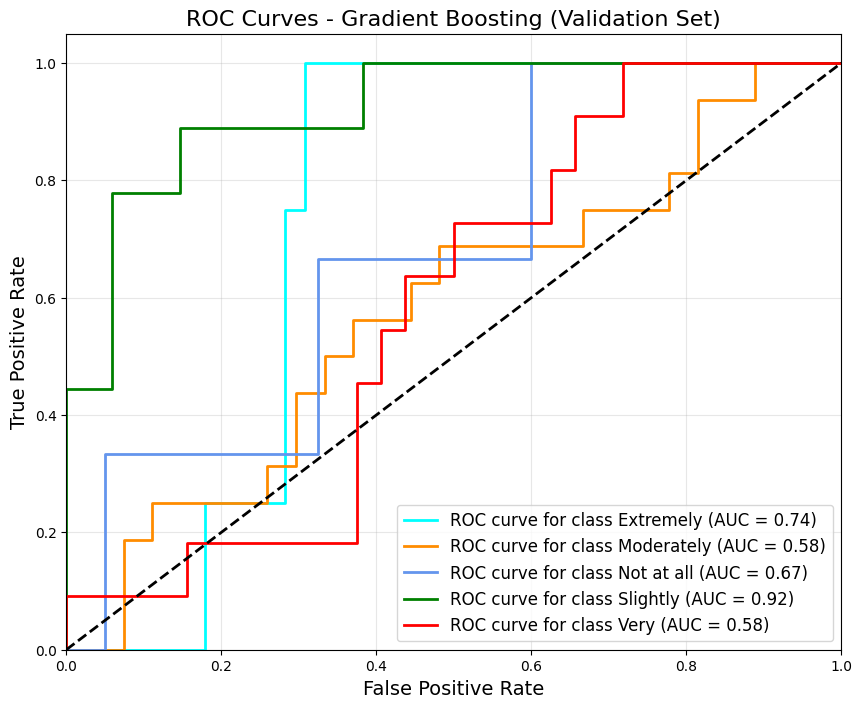


Evaluating model: Support Vector Machine
Validation Accuracy: 0.3721
Validation ROC AUC Score: 0.7469071179365298
Test Accuracy: 0.4651
Test ROC AUC Score: 0.7368388637506285

Classification Report for Support Vector Machine on Validation Set:

              precision    recall  f1-score   support

   Extremely       0.00      0.00      0.00         4
  Moderately       0.33      0.31      0.32        16
  Not at all       0.00      0.00      0.00         3
    Slightly       0.45      0.56      0.50         9
        Very       0.38      0.55      0.44        11

    accuracy                           0.37        43
   macro avg       0.23      0.28      0.25        43
weighted avg       0.32      0.37      0.34        43



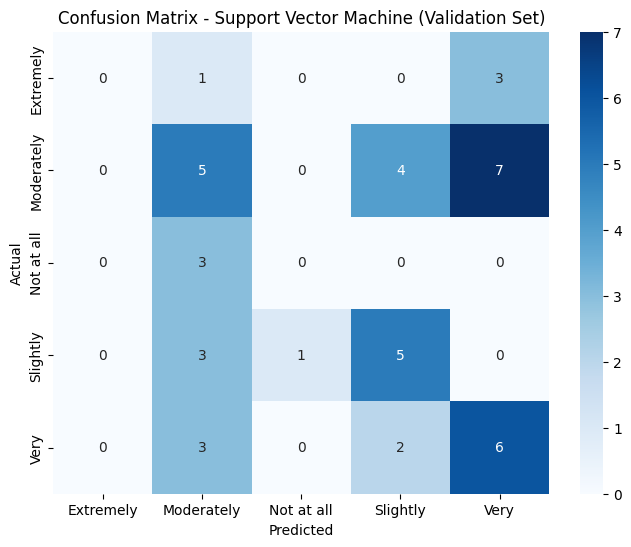

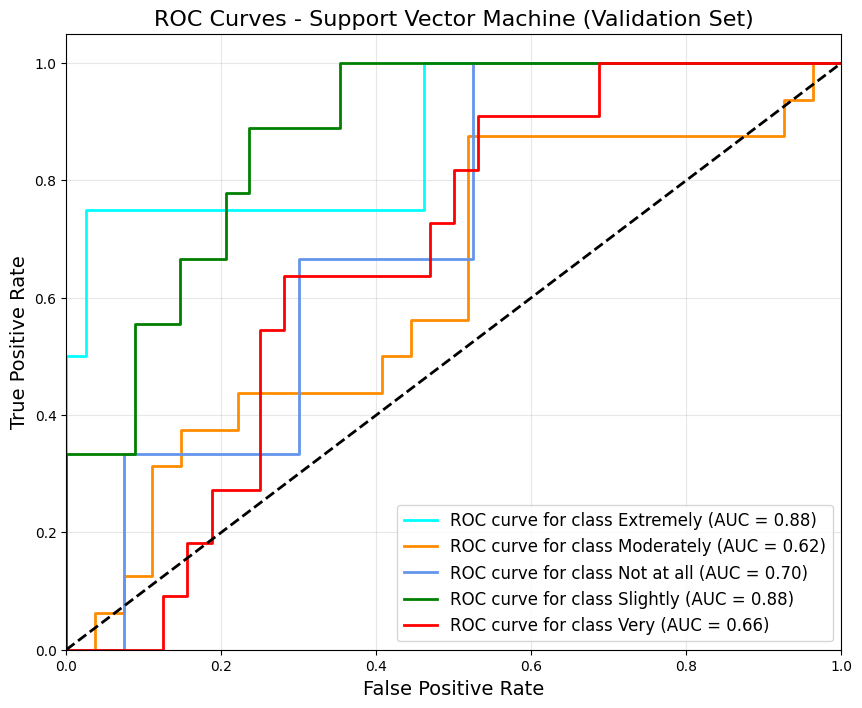

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Binarize the output for ROC AUC calculation
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_val_bin = label_binarize(y_val, classes=classes)
n_classes = y_test_bin.shape[1]

for name, model in models.items():
    print(f"\nEvaluating model: {name}")

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val) if hasattr(model, "predict_proba") else None

    # Evaluate on the validation set
    val_acc = accuracy_score(y_val, y_val_pred)
    val_report = classification_report(y_val, y_val_pred, output_dict=True)

    if y_val_prob is not None:
        try:
            val_roc_auc = roc_auc_score(y_val_bin, y_val_prob, multi_class='ovr', average='macro')
        except ValueError as e:
            print(f"ROC AUC Score could not be computed for {name} on validation set: {e}")
            val_roc_auc = 'N/A'
    else:
        val_roc_auc = 'N/A'

    # Store validation results
    model_performance[name] = {
        'Validation Accuracy': val_acc,
        'Validation Classification Report': val_report,
        'Validation ROC AUC Score': val_roc_auc
    }

    print(f"Validation Accuracy: {val_acc:.4f}")
    print(f"Validation ROC AUC Score: {val_roc_auc}")

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Evaluate on the test set
    test_acc = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)

    if y_test_prob is not None:
        try:
            test_roc_auc = roc_auc_score(y_test_bin, y_test_prob, multi_class='ovr', average='macro')
        except ValueError as e:
            print(f"ROC AUC Score could not be computed for {name} on test set: {e}")
            test_roc_auc = 'N/A'
    else:
        test_roc_auc = 'N/A'

    # Update model performance with test results
    model_performance[name].update({
        'Test Accuracy': test_acc,
        'Test Classification Report': test_report,
        'Test ROC AUC Score': test_roc_auc
    })

    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test ROC AUC Score: {test_roc_auc}")

    # Detailed Classification Report for Validation Set
    print(f"\nClassification Report for {name} on Validation Set:\n")
    print(classification_report(y_val, y_val_pred, target_names=classes.astype(str)))

    # Confusion Matrix for Validation Set
    cm_val = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name} (Validation Set)')
    plt.show()

    # ROC Curves for Validation Set
    if y_val_prob is not None:
        plt.figure(figsize=(10, 8))
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

        for i, color in zip(range(n_classes), colors):
            if hasattr(model, "predict_proba"):
                y_score = model.predict_proba(X_val)[:, i]
            else:
                y_score = model.decision_function(X_val)[:, i]

            fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_score)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=2,
                     label=f'ROC curve for class {classes[i]} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=14)
        plt.ylabel('True Positive Rate', fontsize=14)
        plt.title(f'ROC Curves - {name} (Validation Set)', fontsize=16)
        plt.legend(loc="lower right", fontsize=12)
        plt.grid(alpha=0.3)
        plt.show()


